# Animal Disease Outbreaks

- data gathered by EMPRES Global Animal Disease Information System (EMPRES-i)
- 1918 avian Influenza
    - 500 million infected
    - 50-100 million deaths
- more recently MERS & SARS, caused by Coronavirus

# The Data

- from the Emergency Prevention System for Animal Health (EMPRES)
- 30,000 reports (six sets)
- reported 2015-present
- variables include timing, location, species, disease
- half of the variables missing values

# The Goal
- potential target: outbreaks with pandemic potential
- cluster in terms of severity

# Who?

- CDC, WHO, EMPRES
- farmers, butchers, food preparers
- meat-eaters
- people who live

# The Data

I've chosen to explore, and analze data on [animal disease outbreaks](https://www.kaggle.com/tentotheminus9/empres-global-animal-disease-surveillance) found on Kaggle gathered by EMPRES Global Animal Disease Information System (EMPRES-i), an application created to assist veterinary services by providing information on global diseases. The ability to understand the inception and spread of these diseases and ultimately predict where and how future incidents/episodes will unfold is crucial in our efforts to combat the damage caused. While some may believe the animals' health is irrelevant to us, this couldn't be farther from the truth - on an obvious level, because roughly 90% of the world's population eats meat it is advantageous for us to keep our fellow animals healthy. What is less known but perhaps even more important is that many epidemiologists believe it's likely that the next pandemic will come from an animal, similar to the SARS and MERS viruses that have killed hundreds.

The data includes 30,000 reports of animal outbreaks. Each row represents a different outbreak so there are some repeating diseases. Variables include timing, place, species, and diseases, as well as information on the number of animals and humans affected. I'll use clutering and other unsupervised learning in an effort to learn about the onset and dispersion of animal disease outbreaks. Ideally, the data will collect in such a way that I am able to differentiate/locate/predict outbreaks with pandemic potential.

In [496]:
import os
os.chdir('/Users/sophiaperides/Desktop/Thinkful')
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta
import re


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
import scipy.stats as stats
from scipy.stats.mstats import winsorize


import keras
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding, TSNE
import umap
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn import datasets, metrics
from sklearn.neural_network import BernoulliRBM
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage as lnkg

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import GridSearchCV
# from keras.layers import Input,Dense
# from keras.models import Model
# from sklearn import ensemble
# import keras

import warnings
warnings.filterwarnings(action="ignore")

In [497]:
outbreaks1 = pd.read_csv('Outbreak1.csv')
outbreaks2 = pd.read_csv('Outbreak2.csv')
outbreaks3 = pd.read_csv('Outbreak3.csv')
outbreaks4 = pd.read_csv('Outbreak4.csv')
outbreaks5 = pd.read_csv('Outbreak5.csv')
outbreaks6 = pd.read_csv('Outbreak6.csv')
outbreaks = pd.DataFrame(outbreaks1.append([outbreaks2, outbreaks3, outbreaks4, outbreaks5, outbreaks6]))
print(outbreaks.columns)
print(outbreaks.info())
outbreaks.head(10)

Index(['Id', 'source', 'latitude', 'longitude', 'region', 'country', 'admin1',
       'localityName', 'localityQuality', 'observationDate', 'reportingDate',
       'status', 'disease', 'serotypes', 'speciesDescription', 'sumAtRisk',
       'sumCases', 'sumDeaths', 'sumDestroyed', 'sumSlaughtered',
       'humansGenderDesc', 'humansAge', 'humansAffected', 'humansDeaths'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 4999
Data columns (total 24 columns):
Id                    30000 non-null int64
source                30000 non-null object
latitude              30000 non-null float64
longitude             30000 non-null float64
region                30000 non-null object
country               30000 non-null object
admin1                30000 non-null object
localityName          30000 non-null object
localityQuality       30000 non-null object
observationDate       29314 non-null object
reportingDate         30000 non-null object
status     

,Id,source,latitude,longitude,region,country,admin1,localityName,localityQuality,observationDate,reportingDate,status,disease,serotypes,speciesDescription,sumAtRisk,sumCases,sumDeaths,sumDestroyed,sumSlaughtered,humansGenderDesc,humansAge,humansAffected,humansDeaths
0,264093,OIE,18.240550,-70.282265,Americas,Dominican Republic,Peravia,Peravia,Exact,17/09/2019,19/12/2019,Confirmed,Newcastle disease,NaN,"domestic, chicken",13191.0,13191.0,6809.0,6382.0,NaN,NaN,NaN,NaN,NaN
1,264044,OIE,44.109900,26.804200,Europe,Romania,Calarasi,Chislet,Exact,23/12/2019,23/12/2019,Confirmed,African swine fever,NaN,"wild, wild boar",NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,264043,OIE,44.931200,25.626100,Europe,Romania,Dimbovita,Adanca,Exact,23/12/2019,23/12/2019,Confirmed,African swine fever,NaN,"wild, wild boar",NaN,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN
3,264042,OIE,45.161400,25.392900,Europe,Romania,Dimbovita,Runcu,Exact,20/12/2019,23/12/2019,Confirmed,African swine fever,NaN,"wild, wild boar",NaN,2.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,264041,OIE,44.974100,25.464800,Europe,Romania,Dimbovita,Viforata,Exact,19/12/2019,23/12/2019,Confirmed,African swine fever,NaN,"wild, wild boar",18.0,18.0,1.0,17.0,NaN,NaN,NaN,NaN,NaN
5,264040,OIE,45.194500,26.975600,Europe,Romania,Buzau,Boboc,Exact,12/12/2019,23/12/2019,Confirmed,African swine fever,NaN,"wild, wild boar",7.0,7.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN
6,264039,OIE,47.190800,22.512200,Europe,Romania,Bihor,Lapis,Exact,20/12/2019,23/12/2019,Confirmed,African swine fever,NaN,"wild, wild boar",NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
7,264038,OIE,47.743900,23.311200,Europe,Romania,Maramures,Sabisa,Exact,14/12/2019,20/12/2019,Confirmed,African swine fever,NaN,"wild, wild boar",NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
8,264037,OIE,44.818976,25.821518,Europe,Romania,Dimbovita,Finta,Exact,18/12/2019,20/12/2019,Confirmed,African swine fever,NaN,"wild, wild boar",NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
9,264036,OIE,44.666521,23.574296,Europe,Romania,Gorj,Turburea,Exact,16/12/2019,20/12/2019,Confirmed,African swine fever,NaN,"wild, wild boar",NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [498]:
print('Value counts for humansAffected: ', outbreaks.humansAffected.value_counts())
print('Value counts for humansDeaths: ', outbreaks.humansDeaths.value_counts())

Value counts for humansAffected:  1.0      1589
0.0        16
3.0         2
11.0        1
5.0         1
78.0        1
100.0       1
145.0       1
24.0        1
4.0         1
2.0         1
Name: humansAffected, dtype: int64
Value counts for humansDeaths:  1.0    434
0.0     32
2.0      2
6.0      1
3.0      1
Name: humansDeaths, dtype: int64


# The Cleaning

- dropped localityName & humansGenderDesc
- 17,000 missing serotypes
- mean for most float variables
- mode for humansAffected & humansDeaths



# The Cleaning

More than half of the variables are not missing any data which is a great start. Just under 7,000 rows are missing information on serotypes so I will fill these with 'Unknown Serotypes'. Similarly, under 2,000 rows are missing in speciesDescription, so these will be filled with 'Unknown Species'. Additionally, the information populating these cells are lists of animals so I will create new dummy variables with keywords, including 'wild' and 'domestic'. Finally, I'll create new features 'birds' and 'mammals' which will indicate whether a disease affected these classes.

Empty cells in sumAtRisk, sumCases, sumDeaths, sumDestroyed, sumSlaughtered, and humansAge will be filled with the mean value of these columns. I will drop the column humansGenderDesc as there is simply not enough information for me to populate the missing values. As for humansAffected and humansDeaths, I'll populate missing values with the mode.

All dates in the data will be converted to datetime objects and create variables for the year, month, and day of the observation. Missing variables in observationDate will be filled by finding the average difference between the observationDate and reportingDate, and subtracting this number from the reportingDate. A new variable, 'differenceInDays', will be created by finding the difference between the observationDate and reportingDate for each instance. There are just over 3,700 entries with observationDate values after reportingDates. This is impossible, so I will delete these rows.

Dummies will be created for source, region, country, localityQuality, disease, serotypes, and status.

In [499]:
outbreaks.serotypes.fillna('UnknownSerotypes', inplace=True)
outbreaks.speciesDescription.fillna('UnknownSpecies', inplace=True)
outbreaks.sumAtRisk.fillna(outbreaks.sumAtRisk.mean(), inplace=True)
outbreaks.sumCases.fillna(outbreaks.sumCases.mean(), inplace=True)
outbreaks.sumDeaths.fillna(outbreaks.sumDeaths.mean(), inplace=True)
outbreaks.sumDestroyed.fillna(outbreaks.sumDestroyed.mean(), inplace=True)
outbreaks.sumSlaughtered.fillna(outbreaks.sumSlaughtered.mean(), inplace=True)
outbreaks.drop(columns=['humansGenderDesc'], inplace=True)
outbreaks.humansAge.fillna(outbreaks.humansAge.mean(), inplace=True)
outbreaks.humansAffected.fillna(outbreaks.humansAffected.mode()[0], inplace=True)
outbreaks.humansDeaths.fillna(outbreaks.humansDeaths.mode()[0], inplace=True)
outbreaks.shape

(30000, 23)

In [500]:
print('Reporting Dates: \n', outbreaks.reportingDate.head())
print('Observation Dates: \n', outbreaks.observationDate.head())

Reporting Dates: 
 0    19/12/2019
1    23/12/2019
2    23/12/2019
3    23/12/2019
4    23/12/2019
Name: reportingDate, dtype: object
Observation Dates: 
 0    17/09/2019
1    23/12/2019
2    23/12/2019
3    20/12/2019
4    19/12/2019
Name: observationDate, dtype: object


## Dates

 - 3,700 observationDates after reportingDates

In [501]:
# Creating a new dataframe to handle the dates
outbreaks['observationDate'] = pd.to_datetime(outbreaks['observationDate'])
outbreaks['reportingDate'] = pd.to_datetime(outbreaks['reportingDate'])
outbreaks_time = outbreaks[['observationDate', 'reportingDate']]
outbreaks_time.dropna(inplace=True)

# Find the average difference between observation and reporting dates
outbreaks_time['differenceInDays'] = (outbreaks_time['reportingDate'] - outbreaks_time['observationDate'])/np.timedelta64(1,'D')
                                                                     
print('Average difference between observation and reporting dates: ', outbreaks_time['differenceInDays'].mean())
outbreaks.observationDate.fillna(outbreaks.reportingDate - timedelta(days=33), inplace=True)

# Creating a new variable
outbreaks['differenceInDays'] = (outbreaks['reportingDate'] - outbreaks['observationDate'])/np.timedelta64(1,'D')


Average difference between observation and reporting dates:  29.083953059971346


In [502]:
print(outbreaks.columns)
outbreaks.shape


Index(['Id', 'source', 'latitude', 'longitude', 'region', 'country', 'admin1',
       'localityName', 'localityQuality', 'observationDate', 'reportingDate',
       'status', 'disease', 'serotypes', 'speciesDescription', 'sumAtRisk',
       'sumCases', 'sumDeaths', 'sumDestroyed', 'sumSlaughtered', 'humansAge',
       'humansAffected', 'humansDeaths', 'differenceInDays'],
      dtype='object')


(30000, 24)

In [503]:
outbreaks['observationYear'] = pd.DatetimeIndex(outbreaks['observationDate']).year
outbreaks['observationMonth'] = pd.DatetimeIndex(outbreaks['observationDate']).month
outbreaks['observationDay'] = pd.DatetimeIndex(outbreaks['observationDate']).day
outbreaks['observationFirstHalfMonth'] = outbreaks['observationDay'].apply(lambda x: 1 if x <= 15 else 0 )
outbreaks['observationSecondHalfMonth'] = outbreaks['observationDay'].apply(lambda x: 1 if x > 15 else 0 )

In [504]:
print('Unique values in source: ', len(outbreaks.source.unique()))
print('Unique values in region: ', len(outbreaks.region.unique()))
print('Unique values in country: ', len(outbreaks.country.unique()))
print('Unique values in admin1: ', len(outbreaks.admin1.unique()))
print('Unique values in localityName: ', len(outbreaks.localityName.unique()))
print('Unique values in localityQuality: ', len(outbreaks.localityQuality.unique()))
print('Unique values in status: ', len(outbreaks.status.unique()))
print('Unique values in disease: ', len(outbreaks.disease.unique()))
print('Unique values in serotypes: ', len(outbreaks.serotypes.unique()))
print('Unique values in speciesDescription: ', len(outbreaks.speciesDescription.unique()))


Unique values in source:  14
Unique values in region:  4
Unique values in country:  140
Unique values in admin1:  1312
Unique values in localityName:  16763
Unique values in localityQuality:  5
Unique values in status:  2
Unique values in disease:  25
Unique values in serotypes:  62
Unique values in speciesDescription:  371


In [505]:
print('Unique values in source: ', outbreaks.source.unique())
print('Unique values in region: ', outbreaks.region.unique())
# print('Unique values in country: ', len(outbreaks.country.unique())
# print('Unique values in admin1: ', len(outbreaks.admin1.unique())
# print('Unique values in localityName: ', len(outbreaks.localityName.unique()))
print('Unique values in localityQuality: ', outbreaks.localityQuality.unique())
print('Unique values in status: ', outbreaks.status.unique())
print('Unique values in disease: ', outbreaks.disease.unique())
print('Unique values in serotypes: ', outbreaks.serotypes.unique())
# print('Unique values in speciesDescription: ', len(outbreaks.speciesDescription.unique()))


Unique values in source:  ['OIE' 'Other' 'National authorities' 'FAO Field Officer' 'FAO-Report'
 'FAO ECTAD RAF' 'UN Field Officer' 'Media' 'WHO'
 'International reference laboratory'
 'National Institute for Communicable Diseases, NICD' 'EC' 'FAO officer'
 'sequence only']
Unique values in region:  ['Americas' 'Europe' 'Asia' 'Africa']
Unique values in localityQuality:  ['Exact' 'Centroid Locality' 'Centroid Admin1' 'Unknown' 'Centroid Admin2']
Unique values in status:  ['Confirmed' 'Denied']
Unique values in disease:  ['Newcastle disease' 'African swine fever' 'Foot and mouth disease'
 'Rabies' 'Influenza - Avian' 'Rift Valley fever' 'Bluetongue'
 'Classical swine fever' 'MERS-CoV ' 'West Nile Fever'
 'Lumpy skin disease' 'Equine infectious anaemia'
 'Peste des petits ruminants' 'Sheep pox and goat pox' 'Anthrax'
 'Influenza - Equine' 'Glanders' 'Bovine spongiform encephalopathy'
 'Contagious bovine pleuropneumonia' 'Brucellosis (Brucella abortus)'
 'Brucellosis (Brucella melitensis

In [506]:
outbreaks = pd.concat([outbreaks, pd.get_dummies(outbreaks['source'])], axis=1)
outbreaks = pd.concat([outbreaks, pd.get_dummies(outbreaks['region'])], axis=1)
outbreaks = pd.concat([outbreaks, pd.get_dummies(outbreaks['country'])], axis=1)
outbreaks.drop(columns=['admin1', 'localityName'], inplace=True)
outbreaks = pd.concat([outbreaks, pd.get_dummies(outbreaks['localityQuality'])], axis=1)
outbreaks = pd.concat([outbreaks, pd.get_dummies(outbreaks['status'])], axis=1)
outbreaks = pd.concat([outbreaks, pd.get_dummies(outbreaks['disease'])], axis=1)
outbreaks = pd.concat([outbreaks, pd.get_dummies(outbreaks['serotypes'])], axis=1)
outbreaks.shape

(30000, 279)

## speciesDescription

In [507]:
outbreaks.speciesDescription.unique()

array(['domestic, chicken', 'wild, wild boar', 'domestic, swine',
       'domestic, cattle', 'domestic, dog', 'domestic, cat',
       'domestic, unspecified bird', 'domestic, ostrich',
       'domestic, goat/sheep ', 'domestic, sheep',
       'wild,mute swan (cygnus olor))', 'UnknownSpecies',
       'domestic, duck', 'domestic, turkey', 'domestic, goose',
       'wild, crow', 'environmental sample, unspecified bird',
       'domestic, equidae', 'domestic, muscovy ducks', 'domestic, quail',
       'environmental sample, unspecified env. sample, environmental sample, unspecified env. sample',
       'environmental sample, unspecified env. sample', 'domestic, horse',
       'wild, unspecified bird', 'wild, owl',
       'environmental sample, unspecified bird, environmental sample, unspecified bird',
       'domestic, goat, domestic, sheep',
       'wild,rose pelican (pelecanus onocrotalus))',
       'wild,greater flamingo (phoenicopterus roseus))', 'domestic, goat',
       'domestic, catt

In [508]:
outbreaks['wild'] = outbreaks.speciesDescription.apply(lambda x: 1 if 'wild' in x else 0)
outbreaks['undomestic'] = outbreaks.speciesDescription.apply(lambda x: 1 if 'undomestic' in x else 0)
outbreaks['domestic'] = outbreaks.speciesDescription.apply(lambda x: 1 if 'domestic' in x else 0)
outbreaks['captive'] = outbreaks.speciesDescription.apply(lambda x: 1 if 'captive' in x else 0)
outbreaks['unspecified'] = outbreaks.speciesDescription.apply(lambda x: 1 if 'unspecified' in x else 0)
outbreaks.head(10)

,Id,source,latitude,longitude,region,country,localityQuality,observationDate,reportingDate,status,disease,serotypes,speciesDescription,sumAtRisk,sumCases,sumDeaths,sumDestroyed,sumSlaughtered,humansAge,humansAffected,humansDeaths,differenceInDays,observationYear,observationMonth,observationDay,observationFirstHalfMonth,observationSecondHalfMonth,EC,FAO ECTAD RAF,FAO Field Officer,FAO officer,FAO-Report,International reference laboratory,Media,"National Institute for Communicable Diseases, NICD",National authorities,OIE,Other,UN Field Officer,WHO,sequence only,Africa,Americas,Asia,Europe,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Austria,Bahrain,Bangladesh,Belarus,Belgium,Belize,Bhutan,Bosnia and Herzegovina,Botswana,Brazil,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Croatia,Cyprus,Czech Republic,Côte d'Ivoire,Dem People's Rep of Korea,Democratic Republic of the Congo,Denmark,Dominican Republic,Ecuador,Egypt,El Salvador,Estonia,Ethiopia,Finland,France,Gambia,Gaza Strip,Georgia,Germany,Ghana,Greece,Guinea,Guinea-Bissau,Honduras,"Hong Kong, SAR",Hungary,India,Indonesia,Iran (Islamic Republic of),Iraq,Ireland,Israel,Italy,Japan,Jordan,Kazakhstan,Kenya,Kuwait,Kyrgyzstan,Lao People's Democratic Republic,Latvia,Lebanon,Lesotho,Libya,Lithuania,Luxembourg,Macau,Malawi,Malaysia,Maldives,Mali,Malta,Mauritania,Mauritius,Mayotte,Mexico,"Moldova, Republic of",Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,Niger,Nigeria,Oman,Pakistan,Panama,Peru,Philippines,Poland,Portugal,Qatar,Republic of Korea,Romania,Russian Federation,Rwanda,Saudi Arabia,Senegal,Serbia,Sierra Leone,Slovakia,Slovenia,South Africa,South Sudan,Spain,Sudan,Svalbard and Jan Mayen Islands,Swaziland,Sweden,Switzerland,Syrian Arab Republic,Taiwan (Province of China),Thailand,The former Yugoslav Republic of Macedonia,Timor-Leste,Togo,Tunisia,Turkey,U.K. of Great Britain and Northern Ireland,Uganda,Ukraine,United Arab Emirates,United Republic of Tanzania,United States of America,Uruguay,Viet Nam,West Bank,Zambia,Zimbabwe,Centroid Admin1,Centroid Admin2,Centroid Locality,Exact,Unknown,Confirmed,Denied,African horse sickness,African swine fever,Anthrax,Bluetongue,Bovine spongiform encephalopathy,Bovine tuberculosis,Brucellosis (Brucella abortus),Brucellosis (Brucella melitensis),Brucellosis (Brucella suis),Classical swine fever,Contagious bovine pleuropneumonia,Equine infectious anaemia,Foot and mouth disease,Glanders,Influenza - Avian,Influenza - Equine,Lumpy skin disease,MERS-CoV,Newcastle disease,Peste des petits ruminants,Porcine reproductive and respiratory syndrome,Rabies,Rift Valley fever,Sheep pox and goat pox,West Nile Fever,1,16,19,2,22,3,4,5,7,8,"8, 4",A,"A, O",APMV-I,Asia 1,H3 LPAI,H3N1 LPAI,H3N8,H5 HPAI,H5 LPAI,H5N1 HPAI,H5N1 LPAI,"H5N1 LPAI, H5N2 LPAI",H5N2 HPAI,H5N2 LPAI,"H5N2 LPAI, H6N2 LPAI","H5N2 LPAI, H7N7 LPAI",H5N3 HPAI,H5N3 LPAI,"H5N3 LPAI, H5N2 LPAI",H5N5 HPAI,H5N5 LPAI,H5N6 HPAI,H5N6 LPAI,H5N8 HPAI,"H5N8 HPAI, H5N2 HPAI",H5N8 LPAI,H5N9 HPAI,H5N9 LPAI,H6N2 LPAI,H7 LPAI,H7N1 HPAI,H7N1 LPAI,H7N2 LPAI,H7N3 HPAI,H7N3 LPAI,H7N4 LPAI,H7N6 LPAI,H7N7 HPAI,H7N7 LPAI,H7N9 HPAI,H7N9 LPAI,H9N2 LPAI,HPAI,LPAI,Not Specified,Not specified,O,SAT1,SAT2,SAT3,UnknownSerotypes,wild,undomestic,domestic,captive,unspecified
0,264093,OIE,18.240550,-70.282265,Americas,Dominican Republic,Exact,2019-09-17,2019-12-19,Confirmed,Newcastle disease,UnknownSerotypes,"domestic, chicken",13191.000000,13191.0,6809.000000,6382.000000,202.743361,8.823313,1.0,1.0,93.0,2019,9,17,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [509]:
birds = ['bird', 'swan', 'turkey', 'mallard', 'goose', 'duck', 'pigeon', 'heron', 'accipitridae', 'gull', 
         'phasianidae', 'eagle', 'chicken', 'buzzard', 'falcon', 'anatidae', 'fowl', 'eider', 'pelican', 'wigeon',
        'dove', 'rook', 'stork', 'egret', ' peafowl', 'cormorant', 'coot', 'crow', 'scaup', 'teal', 'magpie', 
         'kestrel', 'blackbird', 'gadwall', 'pochard', 'shelduck', 'parrot', 'tern', ' grebe', 'flamingo', 'eagle-owl',
        'accipiter gentilis', 'ibis', 'ibex', 'emu', 'xpeacock', 'magpie-robin', 'ostrich']
mammals = ['swine', 'boar', 'equidae', 'dog', 'sheep', 'cat', 'goat/sheep', 'goat', 'camelidae', 'horse',
          'fox', 'jackal', ' saiga', 'yaks', 'hippopotamus', 'buffaloe', 'deer', 'canine', 'elephant', 'mammal', 'cattle']

outbreaks['speciesDescription'] = outbreaks.speciesDescription.apply(lambda x: re.split('\s', x))
outbreaks['birds'] = outbreaks.speciesDescription.apply(lambda x: 1 if len(set(x) & set(birds)) > 0  else 0) 
outbreaks['mammals'] = outbreaks.speciesDescription.apply(lambda x: 1 if len(set(x) & set(mammals)) > 0  else 0)

print(outbreaks.shape)
print(outbreaks.birds.value_counts())
outbreaks.head()


(30000, 286)
0    23634
1     6366
Name: birds, dtype: int64


,Id,source,latitude,longitude,region,country,localityQuality,observationDate,reportingDate,status,disease,serotypes,speciesDescription,sumAtRisk,sumCases,sumDeaths,sumDestroyed,sumSlaughtered,humansAge,humansAffected,humansDeaths,differenceInDays,observationYear,observationMonth,observationDay,observationFirstHalfMonth,observationSecondHalfMonth,EC,FAO ECTAD RAF,FAO Field Officer,FAO officer,FAO-Report,International reference laboratory,Media,"National Institute for Communicable Diseases, NICD",National authorities,OIE,Other,UN Field Officer,WHO,sequence only,Africa,Americas,Asia,Europe,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Austria,Bahrain,Bangladesh,Belarus,Belgium,Belize,Bhutan,Bosnia and Herzegovina,Botswana,Brazil,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Croatia,Cyprus,Czech Republic,Côte d'Ivoire,Dem People's Rep of Korea,Democratic Republic of the Congo,Denmark,Dominican Republic,Ecuador,Egypt,El Salvador,Estonia,Ethiopia,Finland,France,Gambia,Gaza Strip,Georgia,Germany,Ghana,Greece,Guinea,Guinea-Bissau,Honduras,"Hong Kong, SAR",Hungary,India,Indonesia,Iran (Islamic Republic of),Iraq,Ireland,Israel,Italy,Japan,Jordan,Kazakhstan,Kenya,Kuwait,Kyrgyzstan,Lao People's Democratic Republic,Latvia,Lebanon,Lesotho,Libya,Lithuania,Luxembourg,Macau,Malawi,Malaysia,Maldives,Mali,Malta,Mauritania,Mauritius,Mayotte,Mexico,"Moldova, Republic of",Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,Niger,Nigeria,Oman,Pakistan,Panama,Peru,Philippines,Poland,Portugal,Qatar,Republic of Korea,Romania,Russian Federation,Rwanda,Saudi Arabia,Senegal,Serbia,Sierra Leone,Slovakia,Slovenia,South Africa,South Sudan,Spain,Sudan,Svalbard and Jan Mayen Islands,Swaziland,Sweden,Switzerland,Syrian Arab Republic,Taiwan (Province of China),Thailand,The former Yugoslav Republic of Macedonia,Timor-Leste,Togo,Tunisia,Turkey,U.K. of Great Britain and Northern Ireland,Uganda,Ukraine,United Arab Emirates,United Republic of Tanzania,United States of America,Uruguay,Viet Nam,West Bank,Zambia,Zimbabwe,Centroid Admin1,Centroid Admin2,Centroid Locality,Exact,Unknown,Confirmed,Denied,African horse sickness,African swine fever,Anthrax,Bluetongue,Bovine spongiform encephalopathy,Bovine tuberculosis,Brucellosis (Brucella abortus),Brucellosis (Brucella melitensis),Brucellosis (Brucella suis),Classical swine fever,Contagious bovine pleuropneumonia,Equine infectious anaemia,Foot and mouth disease,Glanders,Influenza - Avian,Influenza - Equine,Lumpy skin disease,MERS-CoV,Newcastle disease,Peste des petits ruminants,Porcine reproductive and respiratory syndrome,Rabies,Rift Valley fever,Sheep pox and goat pox,West Nile Fever,1,16,19,2,22,3,4,5,7,8,"8, 4",A,"A, O",APMV-I,Asia 1,H3 LPAI,H3N1 LPAI,H3N8,H5 HPAI,H5 LPAI,H5N1 HPAI,H5N1 LPAI,"H5N1 LPAI, H5N2 LPAI",H5N2 HPAI,H5N2 LPAI,"H5N2 LPAI, H6N2 LPAI","H5N2 LPAI, H7N7 LPAI",H5N3 HPAI,H5N3 LPAI,"H5N3 LPAI, H5N2 LPAI",H5N5 HPAI,H5N5 LPAI,H5N6 HPAI,H5N6 LPAI,H5N8 HPAI,"H5N8 HPAI, H5N2 HPAI",H5N8 LPAI,H5N9 HPAI,H5N9 LPAI,H6N2 LPAI,H7 LPAI,H7N1 HPAI,H7N1 LPAI,H7N2 LPAI,H7N3 HPAI,H7N3 LPAI,H7N4 LPAI,H7N6 LPAI,H7N7 HPAI,H7N7 LPAI,H7N9 HPAI,H7N9 LPAI,H9N2 LPAI,HPAI,LPAI,Not Specified,Not specified,O,SAT1,SAT2,SAT3,UnknownSerotypes,wild,undomestic,domestic,captive,unspecified,birds,mammals
0,264093,OIE,18.24055,-70.282265,Americas,Dominican Republic,Exact,2019-09-17,2019-12-19,Confirmed,Newcastle disease,UnknownSerotypes,"[domestic,, chicken]",13191.000000,13191.0,6809.0,6382.000000,202.743361,8.823313,1.0,1.0,93.0,2019,9,17,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

There are just over 3,700 entries with observationDate values after reportingDates. While at first glance this may seem impossible, my guess is that these cases were observed after the initial reports so I will leave them.

# Combining Cases

Just under 6,000 outbreaks.

In [517]:
sum_variables = ('sumAtRisk', 'sumCases', 'sumDeaths', 'sumDestroyed', 'sumSlaughtered', 'humansAffected', 
                 'humansDeaths')
mean_variables = ('humansAge', 'differenceInDays', 'observationYear', 'observationMonth', 'observationDay')
categorical_variables = ('observationFirstHalfMonth','observationSecondHalfMonth','EC', 'FAO ECTAD RAF', 
                    'FAO Field Officer','FAO officer','FAO-Report', 'International reference laboratory', 'Media', 
                  'National Institute for Communicable Diseases, NICD', 'National authorities', 'OIE', 'Other', 
                  'UN Field Officer','WHO', 'sequence only', 'Africa', 'Americas', 'Asia', 'Europe', 'Afghanistan',
                  'Albania','Algeria','Angola','Argentina','Armenia','Austria','Bahrain','Bangladesh','Belarus',
                  'Belgium','Belize','Bhutan','Bosnia and Herzegovina','Botswana','Brazil','Bulgaria','Burkina Faso',
                  'Burundi','Cambodia','Cameroon','Canada','Central African Republic','Chad','Chile','China','Colombia',
                  'Comoros','Croatia','Cyprus','Czech Republic','Côte d\'Ivoire','Dem People\'s Rep of Korea',
                  'Democratic Republic of the Congo','Denmark','Dominican Republic','Ecuador','Egypt','El Salvador',
                  'Estonia','Ethiopia','Finland','France','Gambia','Gaza Strip','Georgia','Germany','Ghana','Greece',
                  'Guinea','Guinea-Bissau','Honduras','Hong Kong, SAR','Hungary','India','Indonesia',
                  'Iraq','Ireland','Israel','Italy','Japan','Jordan','Kazakhstan','Kenya',
                  'Kuwait','Kyrgyzstan','Lao People\'s Democratic Republic','Latvia','Lebanon','Lesotho','Libya',
                  'Lithuania','Luxembourg','Macau','Malawi','Malaysia','Maldives','Mali','Malta','Mauritania',
                  'Mauritius','Mayotte','Mexico','Moldova, Republic of','Mongolia','Montenegro','Morocco','Mozambique',
                  'Myanmar','Namibia','Nepal','Netherlands','Niger','Nigeria','Oman','Pakistan','Panama','Peru',
                  'Philippines','Poland','Portugal','Qatar','Republic of Korea','Romania','Russian Federation','Rwanda',
                  'Saudi Arabia','Senegal','Serbia','Sierra Leone','Slovakia','Slovenia','South Africa','South Sudan',
                  'Spain','Sudan','Svalbard and Jan Mayen Islands','Swaziland','Sweden','Switzerland','Syrian Arab Republic',
                  'Taiwan (Province of China)','Thailand','The former Yugoslav Republic of Macedonia','Timor-Leste',
                  'Togo','Tunisia','Turkey','U.K. of Great Britain and Northern Ireland','Uganda','Ukraine',
                  'United Arab Emirates','United Republic of Tanzania','United States of America','Uruguay',
                  'Viet Nam','West Bank','Zambia','Zimbabwe','Centroid Admin1','Centroid Admin2','Centroid Locality',
                  'Exact','Unknown','Confirmed','Denied','African horse sickness','African swine fever','Anthrax',
                  'Bluetongue','Bovine spongiform encephalopathy','Bovine tuberculosis','Brucellosis (Brucella abortus)',
                  'Brucellosis (Brucella melitensis)','Brucellosis (Brucella suis)','Classical swine fever',
                  'Contagious bovine pleuropneumonia','Equine infectious anaemia','Foot and mouth disease','Glanders',
                  'Influenza - Avian','Influenza - Equine','Lumpy skin disease','MERS-CoV ','Newcastle disease',
                  'Peste des petits ruminants','Porcine reproductive and respiratory syndrome','Rabies',
                  'Rift Valley fever', 'Sheep pox and goat pox', 'West Nile Fever','1','16','19','2','22','3',
                    '4','5','7','8','8, 4','A','A, O','APMV-I','Asia 1','H3 LPAI','H3N1 LPAI','H3N8','H5 HPAI','H5 LPAI',
                    'H5N1 HPAI','H5N1 LPAI','H5N1 LPAI, H5N2 LPAI','H5N2 HPAI','H5N2 LPAI','H5N2 LPAI, H6N2 LPAI',
                    'H5N2 LPAI, H7N7 LPAI','H5N3 HPAI','H5N3 LPAI','H5N3 LPAI, H5N2 LPAI','H5N5 HPAI','H5N5 LPAI',
                    'H5N6 HPAI','H5N6 LPAI','H5N8 HPAI','H5N8 HPAI, H5N2 HPAI','H5N8 LPAI','H5N9 HPAI','H5N9 LPAI',
                    'H6N2 LPAI','H7 LPAI','H7N1 HPAI','H7N1 LPAI','H7N2 LPAI','H7N3 HPAI','H7N3 LPAI','H7N4 LPAI',
                    'H7N6 LPAI','H7N7 HPAI','H7N7 LPAI','H7N9 HPAI','H7N9 LPAI','H9N2 LPAI','HPAI','LPAI','Not Specified',
                    'Not specified','O','SAT1','SAT2','SAT3','UnknownSerotypes','wild','undomestic','domestic','captive',
                    'unspecified','birds','mammals')
X = outbreaks.groupby([pd.Grouper(key='observationDate', freq='7D'),
    pd.Grouper(key='disease'),pd.Grouper(key='country')]).agg({'sumAtRisk':'sum','sumCases': 'sum','sumDeaths':'sum','sumDestroyed': 'sum','sumSlaughtered':'sum',
      'humansAffected': 'sum', 'humansDeaths': 'sum','humansAge':'mean','differenceInDays' : 'mean', 
      'observationYear': 'mean', 'observationMonth': 'mean', 'observationDay': 'mean', 'observationFirstHalfMonth': 'mean',
      'observationSecondHalfMonth': 'mean','EC': 'mean', 'FAO ECTAD RAF': 'mean', 'FAO Field Officer': 'mean',
    'FAO officer': 'mean','FAO-Report': 'mean', 'International reference laboratory': 'mean', 'Media': 'mean', 
    'National Institute for Communicable Diseases, NICD': 'mean', 'National authorities': 'mean', 'OIE': 'mean',
      'Other': 'mean', 'UN Field Officer': 'mean','WHO': 'mean', 'sequence only': 'mean', 'Africa': 'mean', 'Americas': 'mean',
      'Asia': 'mean', 'Europe': 'mean', 'Afghanistan': 'mean', 'Albania': 'mean','Algeria': 'mean','Angola': 'mean',
      'Argentina': 'mean','Armenia': 'mean','Austria': 'mean','Bahrain': 'mean','Bangladesh': 'mean','Belarus': 'mean',
    'Belgium': 'mean','Belize': 'mean','Bhutan': 'mean','Bosnia and Herzegovina': 'mean','Botswana': 'mean','Brazil': 'mean',
      'Bulgaria': 'mean','Burkina Faso': 'mean','Burundi': 'mean','Cambodia': 'mean','Cameroon': 'mean','Canada': 'mean',
      'Central African Republic': 'mean','Chad': 'mean','Chile': 'mean','China': 'mean','Colombia': 'mean',
     'Comoros': 'mean','Croatia': 'mean','Cyprus': 'mean','Czech Republic': 'mean','Côte d\'Ivoire': 'mean',
      'Dem People\'s Rep of Korea': 'mean',  'Democratic Republic of the Congo': 'mean','Denmark': 'mean','Dominican Republic': 'mean','Ecuador': 'mean',
      'Egypt': 'mean','El Salvador': 'mean','Estonia': 'mean','Ethiopia': 'mean','Finland': 'mean','France': 'mean',
      'Gambia': 'mean','Gaza Strip': 'mean','Georgia': 'mean','Germany': 'mean','Ghana': 'mean','Greece': 'mean',
    'Guinea': 'mean','Guinea-Bissau': 'mean','Honduras': 'mean','Hong Kong, SAR': 'mean','Hungary': 'mean',
    'India': 'mean','Indonesia': 'mean','Iraq': 'mean','Ireland': 'mean',
    'Israel': 'mean','Italy': 'mean','Japan': 'mean','Jordan': 'mean','Kazakhstan': 'mean','Kenya': 'mean',
    'Kuwait': 'mean','Kyrgyzstan': 'mean','Lao People\'s Democratic Republic': 'mean','Latvia': 'mean','Lebanon': 'mean',
      'Lesotho': 'mean','Libya': 'mean','Lithuania': 'mean','Luxembourg': 'mean','Macau': 'mean','Malawi': 'mean',
      'Malaysia': 'mean','Maldives': 'mean','Mali': 'mean','Malta': 'mean','Mauritania': 'mean','Mauritius': 'mean',
      'Mayotte': 'mean','Mexico': 'mean','Moldova, Republic of': 'mean','Mongolia': 'mean','Montenegro': 'mean',
      'Morocco': 'mean','Mozambique': 'mean','Myanmar': 'mean','Namibia': 'mean','Nepal': 'mean','Netherlands': 'mean',
      'Niger': 'mean','Nigeria': 'mean','Oman': 'mean','Pakistan': 'mean','Panama': 'mean','Peru': 'mean',
     'Philippines': 'mean','Poland': 'mean','Portugal': 'mean','Qatar': 'mean','Republic of Korea': 'mean',
      'Romania': 'mean','Russian Federation': 'mean','Rwanda': 'mean', 'Saudi Arabia': 'mean','Senegal': 'mean',
      'Serbia': 'mean','Sierra Leone': 'mean','Slovakia': 'mean','Slovenia': 'mean','South Africa': 'mean',
      'South Sudan': 'mean','Spain': 'mean','Sudan': 'mean','Svalbard and Jan Mayen Islands': 'mean','Swaziland': 'mean',
      'Sweden': 'mean','Switzerland': 'mean','Syrian Arab Republic': 'mean','Taiwan (Province of China)': 'mean',
      'Thailand': 'mean','The former Yugoslav Republic of Macedonia': 'mean','Timor-Leste': 'mean','Togo': 'mean',
      'Tunisia': 'mean','Turkey': 'mean','U.K. of Great Britain and Northern Ireland': 'mean','Uganda': 'mean',
      'Ukraine': 'mean', 'United Arab Emirates': 'mean','United Republic of Tanzania': 'mean',
      'United States of America': 'mean','Uruguay': 'mean','Viet Nam': 'mean','West Bank': 'mean','Zambia': 'mean',
      'Zimbabwe': 'mean','Centroid Admin1': 'mean','Centroid Admin2': 'mean','Centroid Locality': 'mean',
     'Exact': 'mean','Unknown': 'mean','Confirmed': 'mean','Denied': 'mean','African horse sickness': 'mean',
      'African swine fever': 'mean','Anthrax': 'mean','Bluetongue': 'mean','Bovine spongiform encephalopathy': 'mean',
      'Bovine tuberculosis': 'mean','Brucellosis (Brucella abortus)': 'mean', 'Brucellosis (Brucella melitensis)': 'mean',
      'Brucellosis (Brucella suis)': 'mean','Classical swine fever': 'mean','Contagious bovine pleuropneumonia': 'mean',
      'Equine infectious anaemia': 'mean','Foot and mouth disease': 'mean','Glanders': 'mean','Influenza - Avian': 'mean',
      'Influenza - Equine': 'mean','Lumpy skin disease': 'mean','MERS-CoV ': 'mean','Newcastle disease': 'mean',
    'Peste des petits ruminants': 'mean','Porcine reproductive and respiratory syndrome': 'mean','Rabies': 'mean',
    'Rift Valley fever': 'mean', 'Sheep pox and goat pox': 'mean', 'West Nile Fever': 'mean','1': 'mean','16': 'mean',
    '19': 'mean','2': 'mean','22': 'mean','3': 'mean','4': 'mean','5': 'mean','7': 'mean','8': 'mean','8, 4': 'mean',
      'A': 'mean','A, O': 'mean','APMV-I': 'mean','Asia 1': 'mean','H3 LPAI': 'mean','H3N1 LPAI': 'mean',
      'H3N8': 'mean','H5 HPAI': 'mean','H5 LPAI': 'mean','H5N1 HPAI': 'mean','H5N1 LPAI': 'mean','H5N1 LPAI, H5N2 LPAI': 'mean',
      'H5N2 HPAI': 'mean','H5N2 LPAI': 'mean','H5N2 LPAI, H6N2 LPAI': 'mean','H5N2 LPAI, H7N7 LPAI': 'mean',
      'H5N3 HPAI': 'mean','H5N3 LPAI': 'mean','H5N3 LPAI, H5N2 LPAI': 'mean','H5N5 HPAI': 'mean','H5N5 LPAI': 'mean',
      'H5N6 HPAI': 'mean','H5N6 LPAI': 'mean','H5N8 HPAI': 'mean','H5N8 HPAI, H5N2 HPAI': 'mean','H5N8 LPAI': 'mean',
      'H5N9 HPAI': 'mean','H5N9 LPAI': 'mean','H6N2 LPAI': 'mean','H7 LPAI': 'mean','H7N1 HPAI': 'mean','H7N1 LPAI': 'mean',
      'H7N2 LPAI': 'mean','H7N3 HPAI': 'mean','H7N3 LPAI': 'mean','H7N4 LPAI': 'mean','H7N6 LPAI': 'mean',
      'H7N7 HPAI': 'mean','H7N7 LPAI': 'mean','H7N9 HPAI': 'mean','H7N9 LPAI': 'mean','H9N2 LPAI': 'mean','HPAI': 'mean',
      'LPAI': 'mean','Not Specified': 'mean','Not specified': 'mean','O': 'mean','SAT1': 'mean','SAT2': 'mean',
      'SAT3': 'mean','UnknownSerotypes': 'mean','wild': 'mean','undomestic': 'mean','domestic': 'mean','captive': 'mean',
      'unspecified': 'mean','birds': 'mean','mammals': 'mean'})

print(X.shape)
pd.set_option('display.max_columns', None)
X.sort_values('observationDate', ascending=False).head(30)

(5831, 272)


sumAtRisk  \
observationDate disease             country                                    
2020-01-01      Influenza - Avian   Taiwan (Province of China)     20.000000   
                                    Poland                      19581.000000   
2019-12-25      African swine fever Romania                     13617.112168   
                                    Bulgaria                      175.000000   
                                    Hungary                     68060.560838   
                                    Latvia                      47642.392587   
                                    Republic of Korea           34030.280419   
                Influenza - Avian   China                          75.000000   
                                    Poland                      78258.000000   
                                    Taiwan (Province of China)  44571.000000   
                Rabies              Malaysia                        1.000000   
2019-12-18      African swine fever Romania                     54492.448671   
                                    Bulgaria                       48.000000   
                                    China                         435.000000   
                                    Hungary                      6806.056084   
                                    Latvia                      13612.112168   
                                    Republic of Korea           27224.224335   
                Influenza - Avian   Taiwan (Province of China)   6239.000000   
                African swine fever Russian Federation           6806.056084   
                Influenza - Avian   Republic of Korea            6806.056084   
                MERS-CoV            Saudi Arabia                 6806.056084   
                Rabies              Malaysia                        3.000000   
2019-12-11      African swine fever Romania                     68212.560838   
                                    Bulgaria                    54448.448671   
                                    Hungary                      6806.056084   
                                    Latvia                      20418.168252   
                                    Moldova, Republic of         6806.056084   
                                    Poland                       6806.056084   
                                    Republic of Korea           27224.224335   
                Influenza - Avian   Taiwan (Province of China)  63707.056084   

                                                                    sumCases  \
observationDate disease             country                                    
2020-01-01      Influenza - Avian   Taiwan (Province of China)      2.000000   
                                    Poland                       7121.000000   
2019-12-25      African swine fever Romania                         7.000000   
                                    Bulgaria                      175.000000   
                                    Hungary                       147.000000   
                                    Latvia                          8.000000   
                                    Republic of Korea               5.000000   
                Influenza - Avian   China                           9.000000   
                                    Poland                      70058.000000   
                                    Taiwan (Province of China)   5497.000000   
                Rabies              Malaysia                        1.000000   
2019-12-18      African swine fever Romania                        56.000000   
                                    Bulgaria                       48.000000   
                                    China                          15.000000   
                                    Hungary                        52.000000   
                                    Latvia                          2.000000   
                                    Republic of Korea             

In [529]:
# Reassign dummy variables

for variable in categorical_variables:
    name = str(variable)
    X[name] = X[name].apply(lambda x: 1 if x > 0 else 0)
    
print(X.birds.value_counts())
print(X.Zambia.value_counts())
print(X.WHO.value_counts())

0    3868
1    1963
Name: birds, dtype: int64
0    5806
1      25
Name: Zambia, dtype: int64
0    5781
1      50
Name: WHO, dtype: int64


In [519]:
X.describe()

,sumAtRisk,sumCases,sumDeaths,sumDestroyed,sumSlaughtered,humansAffected,humansDeaths,humansAge,differenceInDays,observationYear,observationMonth,observationDay,observationFirstHalfMonth,observationSecondHalfMonth,EC,FAO ECTAD RAF,FAO Field Officer,FAO officer,FAO-Report,International reference laboratory,Media,"National Institute for Communicable Diseases, NICD",National authorities,OIE,Other,UN Field Officer,WHO,sequence only,Africa,Americas,Asia,Europe,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Austria,Bahrain,Bangladesh,Belarus,Belgium,Belize,Bhutan,Bosnia and Herzegovina,Botswana,Brazil,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Croatia,Cyprus,Czech Republic,Côte d'Ivoire,Dem People's Rep of Korea,Democratic Republic of the Congo,Denmark,Dominican Republic,Ecuador,Egypt,El Salvador,Estonia,Ethiopia,Finland,France,Gambia,Gaza Strip,Georgia,Germany,Ghana,Greece,Guinea,Guinea-Bissau,Honduras,"Hong Kong, SAR",Hungary,India,Indonesia,Iraq,Ireland,Israel,Italy,Japan,Jordan,Kazakhstan,Kenya,Kuwait,Kyrgyzstan,Lao People's Democratic Republic,Latvia,Lebanon,Lesotho,Libya,Lithuania,Luxembourg,Macau,Malawi,Malaysia,Maldives,Mali,Malta,Mauritania,Mauritius,Mayotte,Mexico,"Moldova, Republic of",Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,Niger,Nigeria,Oman,Pakistan,Panama,Peru,Philippines,Poland,Portugal,Qatar,Republic of Korea,Romania,Russian Federation,Rwanda,Saudi Arabia,Senegal,Serbia,Sierra Leone,Slovakia,Slovenia,South Africa,South Sudan,Spain,Sudan,Svalbard and Jan Mayen Islands,Swaziland,Sweden,Switzerland,Syrian Arab Republic,Taiwan (Province of China),Thailand,The former Yugoslav Republic of Macedonia,Timor-Leste,Togo,Tunisia,Turkey,U.K. of Great Britain and Northern Ireland,Uganda,Ukraine,United Arab Emirates,United Republic of Tanzania,United States of America,Uruguay,Viet Nam,West Bank,Zambia,Zimbabwe,Centroid Admin1,Centroid Admin2,Centroid Locality,Exact,Unknown,Confirmed,Denied,African horse sickness,African swine fever,Anthrax,Bluetongue,Bovine spongiform encephalopathy,Bovine tuberculosis,Brucellosis (Brucella abortus),Brucellosis (Brucella melitensis),Brucellosis (Brucella suis),Classical swine fever,Contagious bovine pleuropneumonia,Equine infectious anaemia,Foot and mouth disease,Glanders,Influenza - Avian,Influenza - Equine,Lumpy skin disease,MERS-CoV,Newcastle disease,Peste des petits ruminants,Porcine reproductive and respiratory syndrome,Rabies,Rift Valley fever,Sheep pox and goat pox,West Nile Fever,1,16,19,2,22,3,4,5,7,8,"8, 4",A,"A, O",APMV-I,Asia 1,H3 LPAI,H3N1 LPAI,H3N8,H5 HPAI,H5 LPAI,H5N1 HPAI,H5N1 LPAI,"H5N1 LPAI, H5N2 LPAI",H5N2 HPAI,H5N2 LPAI,"H5N2 LPAI, H6N2 LPAI","H5N2 LPAI, H7N7 LPAI",H5N3 HPAI,H5N3 LPAI,"H5N3 LPAI, H5N2 LPAI",H5N5 HPAI,H5N5 LPAI,H5N6 HPAI,H5N6 LPAI,H5N8 HPAI,"H5N8 HPAI, H5N2 HPAI",H5N8 LPAI,H5N9 HPAI,H5N9 LPAI,H6N2 LPAI,H7 LPAI,H7N1 HPAI,H7N1 LPAI,H7N2 LPAI,H7N3 HPAI,H7N3 LPAI,H7N4 LPAI,H7N6 LPAI,H7N7 HPAI,H7N7 LPAI,H7N9 HPAI,H7N9 LPAI,H9N2 LPAI,HPAI,LPAI,Not Specified,Not specified,O,SAT1,SAT2,SAT3,UnknownSerotypes,wild,undomestic,domestic,captive,unspecified,birds,mammals
count,5.831000e+03,5831.000000,5831.000000,5.831000e+03,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.00000,5831.000000,5831.000000,5831.00000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,583

# Visualizations

## Species

- < 2,000 missing
- animal class
- animal description


In [521]:
def plot_species(): 
    plt.figure(figsize=(10,3))
    box = boxenplot = sns.boxenplot(x=X['birds'], y=X['sumCases'])
    plt.title('birds vs sumCases')
    box.set_ylim(0, 10000)
    plt.show()

    plt.figure(figsize=(10,3))
    boxenplot = sns.boxenplot(x=X['birds'], y=X['sumAtRisk'])
    plt.title('birds vs sumAtRisk')
    # boxenplot.set_ylim(0, 600)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['birds'], y=X['sumDeaths'])
    plt.title('birds vs sumDeaths')
    box.set_ylim(0, 10000)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['birds'], y=X['humansAffected'])
    plt.title('birds vs humansAffected')
    # box.set_ylim(0, 10)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['birds'], y=X['humansDeaths'])
    plt.title('birds vs humansAffected')
    # box.set_ylim(0, 10)
    plt.show()

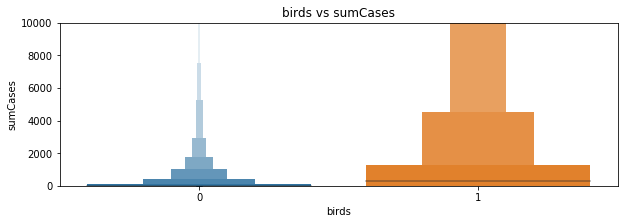

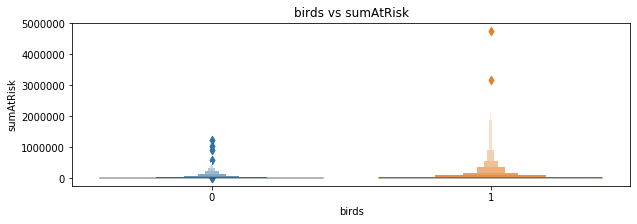

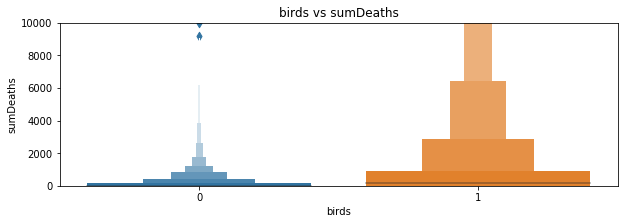

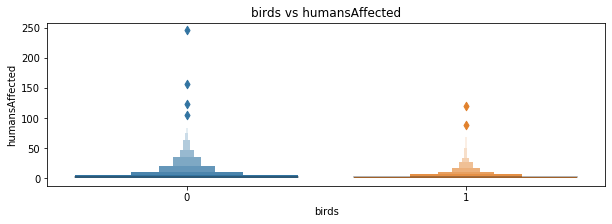

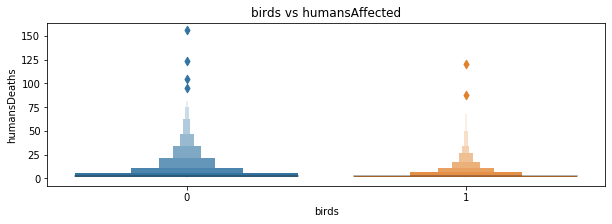

In [522]:
plot_species()

## Discrepancy Between Observation and Reporting Dates

- < 1,000 observationDates missing
- additional feature
- 3,700 observationDates after reportingDates

In [184]:
def plot_differenceInDays():
    plt.figure(figsize=(10,3))
    scatterplot = sns.scatterplot(x=outbreaks['differenceInDays'], y=outbreaks['sumCases'])
    plt.title('differenceInDays vs sumCases')
    scatterplot.set_xlim(0, 600)
    plt.show()

    plt.figure(figsize=(10,3))
    scatterplot = sns.scatterplot(x=outbreaks['differenceInDays'], y=outbreaks['sumAtRisk'])
    plt.title('differenceInDays vs sumAtRisk')
    scatterplot.set_xlim(0, 600)
    plt.show()

    plt.figure(figsize=(10,3))
    scatterplot = sns.scatterplot(x=outbreaks['differenceInDays'], y=outbreaks['sumDeaths'])
    plt.title('differenceInDays vs sumDeaths')
    scatterplot.set_xlim(0, 600)
    plt.show()

    plt.figure(figsize=(10,3))
    scatterplot = sns.scatterplot(x=outbreaks['differenceInDays'], y=outbreaks['humansAffected'])
    plt.title('differenceInDays vs humansAffected')
    scatterplot.set_xlim(0, 600)
    plt.show()

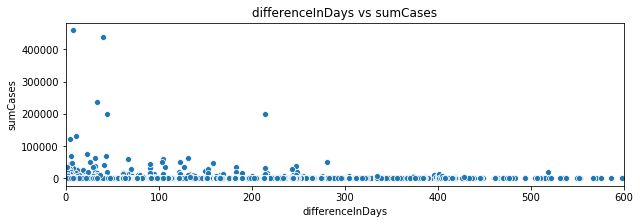

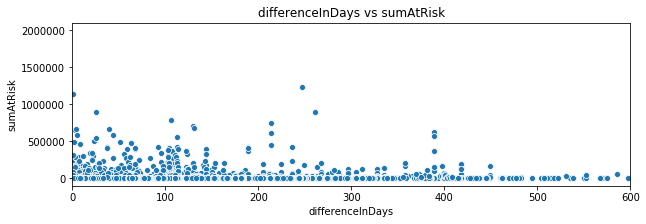

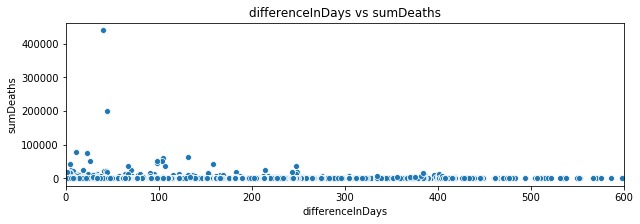

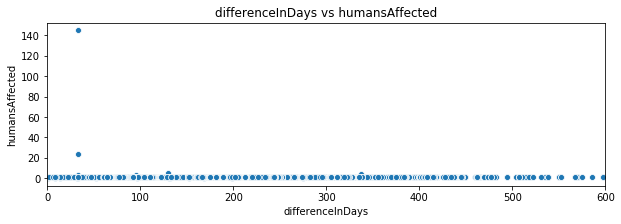

In [32]:
plot_differenceInDays()

## Timing

In [38]:
def plot_timing():
    plt.figure(figsize=(10,3))
    scatterplot = sns.scatterplot(x=outbreaks['observationDate'], y=outbreaks['sumCases'])
    scatterplot.set_xlim(pd.Timestamp('2015-01-01'), pd.Timestamp('2020-01-01'))
    plt.title('observationDate vs sumCases')
    plt.show()

    plt.figure(figsize=(10,3))
    scatterplot = sns.scatterplot(x=outbreaks['observationDate'], y=outbreaks['sumAtRisk'])
    scatterplot.set_xlim(pd.Timestamp('2015-01-01'), pd.Timestamp('2020-01-01'))
    plt.title('observationDate vs sumAtRisk')
    plt.show()

    plt.figure(figsize=(10,3))
    scatterplot = sns.scatterplot(x=outbreaks['observationDate'], y=outbreaks['sumDeaths'])
    scatterplot.set_xlim(pd.Timestamp('2015-01-01'), pd.Timestamp('2020-01-01'))
    plt.title('observationDate vs sumDeaths')
    plt.show()

    plt.figure(figsize=(10,3))
    scatterplot = sns.scatterplot(x=outbreaks['observationDate'], y=outbreaks['humansAffected'])
    scatterplot.set_xlim(pd.Timestamp('2015-01-01'), pd.Timestamp('2020-01-01'))
    plt.title('observationDate vs humansAffected')
    plt.show()

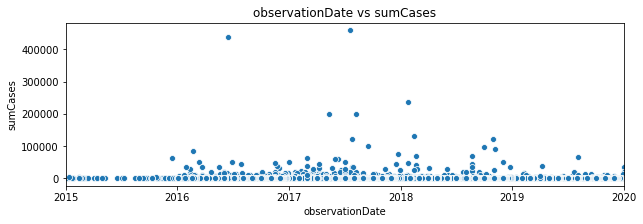

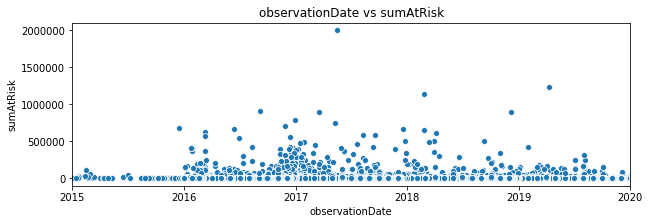

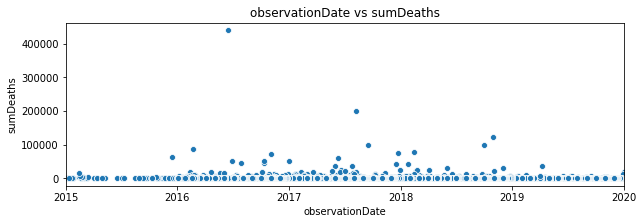

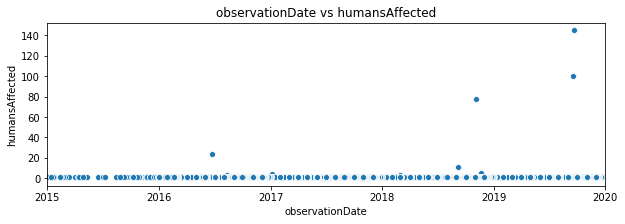

In [39]:
plot_timing()

## Diseases

In [36]:
def plot_diseases():
    plt.figure(figsize=(17,8))
    box = sns.boxplot(y='sumCases', x='disease', data=top8_diseases)
    plt.title('sumCases vs disease')
    box.set_ylim(0, 4000)
    plt.show()

    plt.figure(figsize=(17,8))
    box = sns.boxplot(y='sumDeaths', x='disease', data=top8_diseases)
    plt.title('sumDeaths vs disease')
    box.set_ylim(0, 4000)
    plt.show()

    plt.figure(figsize=(17,8))
    box = sns.boxplot(y='sumSlaughtered', x='disease', data=top8_diseases)
    plt.title('sumSlaughtered vs disease')
    box.set_ylim(0, 1000)
    plt.show()


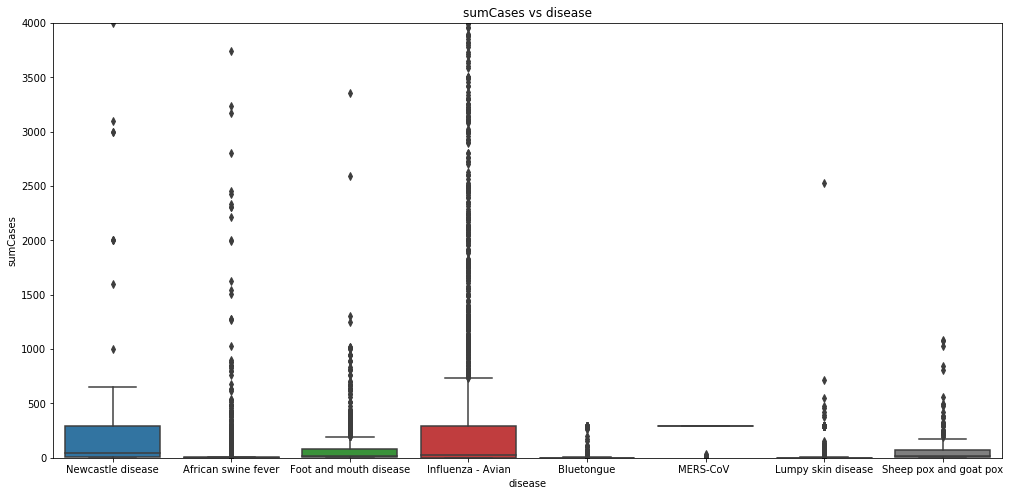

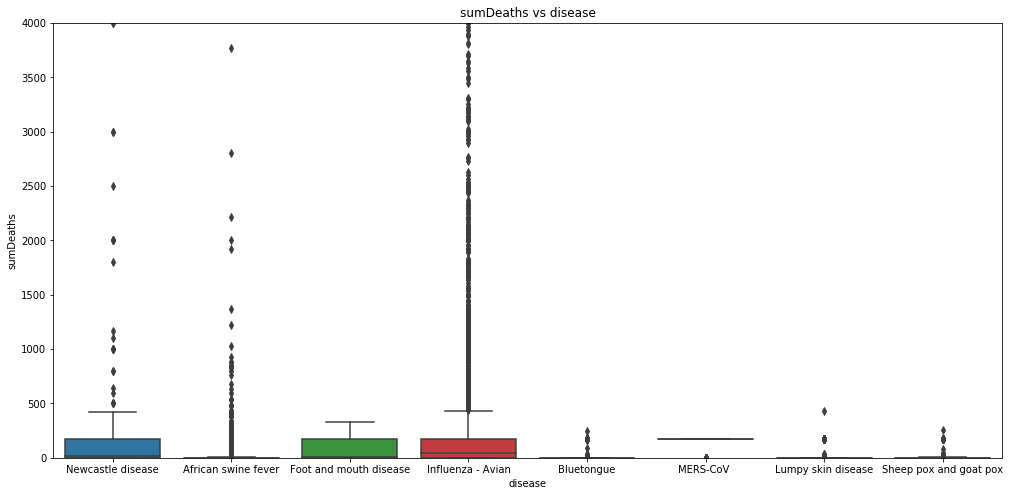

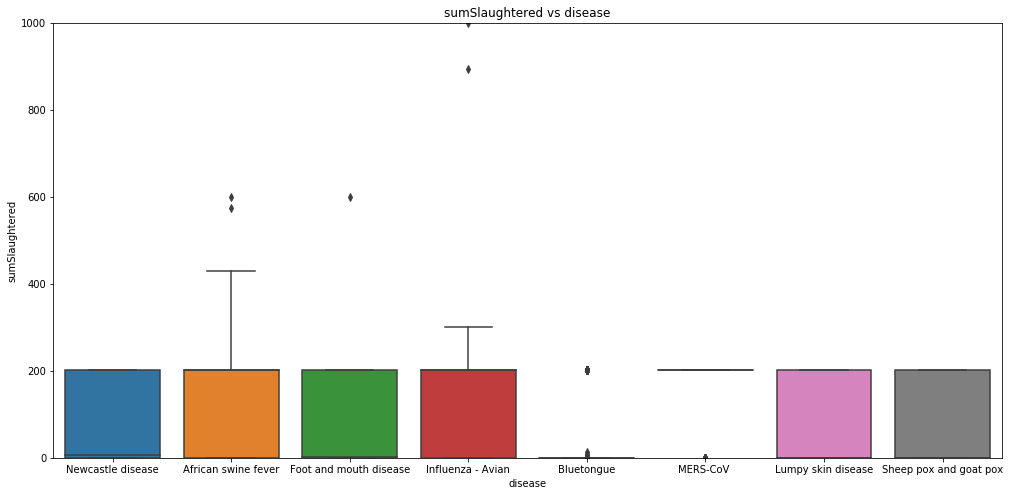

In [37]:
plot_diseases()

## Regions

In [40]:
def plot_regions(): 
    plt.figure(figsize=(10,3))
    box = boxenplot = sns.boxenplot(x=outbreaks['region'], y=outbreaks['sumCases'])
    plt.title('differenceInDays vs sumCases')
    box.set_ylim(0, 10000)
    plt.show()

    plt.figure(figsize=(10,3))
    boxenplot = sns.boxenplot(x=outbreaks['region'], y=outbreaks['sumAtRisk'])
    plt.title('differenceInDays vs sumAtRisk')
    # boxenplot.set_ylim(0, 600)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=outbreaks['region'], y=outbreaks['sumDeaths'])
    plt.title('differenceInDays vs sumDeaths')
    box.set_ylim(0, 10000)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=outbreaks['region'], y=outbreaks['humansAffected'])
    plt.title('differenceInDays vs humansAffected')
    # box.set_ylim(0, 10)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=outbreaks['region'], y=outbreaks['humansDeaths'])
    plt.title('differenceInDays vs humansAffected')
    # box.set_ylim(0, 10)
    plt.show()

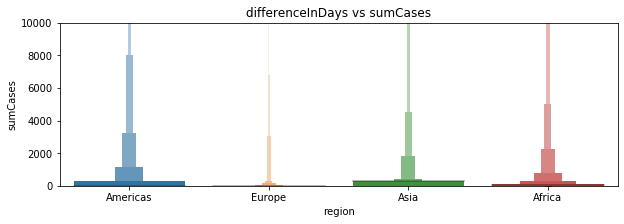

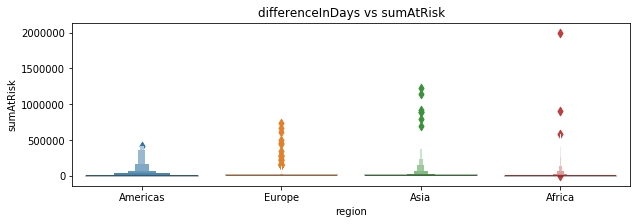

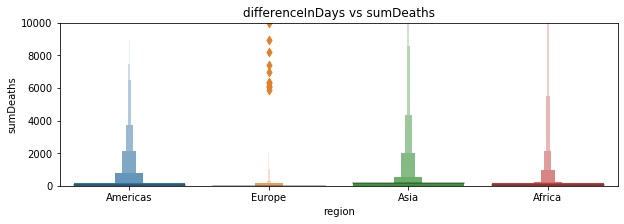

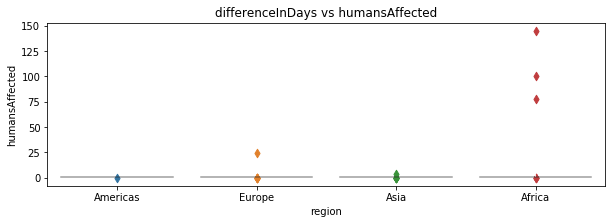

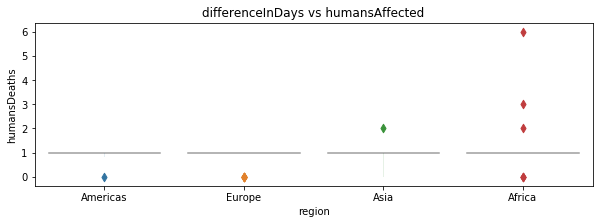

In [41]:
plot_regions()

# Checking Normality and Standardizing Features

In [523]:
features_to_test = X[['sumAtRisk', 'sumCases', 'sumDeaths', 'sumDestroyed', 'sumSlaughtered', 'humansAge',
                             'humansAffected', 'humansDeaths', 'differenceInDays']]
for feat in features_to_test:
    jb_stats = stats.jarque_bera(outbreaks[feat])
    norm_stats = stats.normaltest(outbreaks[feat])
    
    print("Testing for normality on {}:".format(feat))
    print('Jarque-Bera test statistics for', feat, 'is {0} and p value is {1}'.format(jb_stats[0], jb_stats[1]))
    print('Normality test statistics for', feat, 'is {0} and p value is {1}\n'.format(norm_stats[0], norm_stats[1]))

Testing for normality on sumAtRisk:
Jarque-Bera test statistics for sumAtRisk is 1058916659.9518175 and p value is 0.0
Normality test statistics for sumAtRisk is 70886.09707350767 and p value is 0.0

Testing for normality on sumCases:
Jarque-Bera test statistics for sumCases is 30342330429.314793 and p value is 0.0
Normality test statistics for sumCases is 101453.19851759728 and p value is 0.0

Testing for normality on sumDeaths:
Jarque-Bera test statistics for sumDeaths is 132971161551.42944 and p value is 0.0
Normality test statistics for sumDeaths is 114371.69585736668 and p value is 0.0

Testing for normality on sumDestroyed:
Jarque-Bera test statistics for sumDestroyed is 840207200.4416709 and p value is 0.0
Normality test statistics for sumDestroyed is 71431.01725137612 and p value is 0.0

Testing for normality on sumSlaughtered:
Jarque-Bera test statistics for sumSlaughtered is 20359627578.794685 and p value is 0.0
Normality test statistics for sumSlaughtered is 99718.4030600604

In [524]:
for feat in features_to_test:
    print('Testing Normality for Transformed', feat)
    winsorized_feature = winsorize(X[feat], (0, 0.10))
    print('Normality for winsorize: ', stats.normaltest(winsorized_feature))
    try:
        log_feature = np.log(X[feat])
        print('Normality for log: ', stats.normaltest(log_feature))
    except ValueError:
        print('Log of data cannot be found.')
    try:
        sqrt_feature = np.sqrt(X[feat])
        print('Normality for square root: ', stats.normaltest(sqrt_feature))
    except ValueError:
        print('Square root of data cannot be found.')
    try:
        bc_feature, _ = stats.boxcox(X[feat])
        print('Normality for boxcox: ', stats.normaltest(bc_feature))
    except ValueError:
        print('Data isn\'t positive.')

Testing Normality for Transformed sumAtRisk
Normality for winsorize:  NormaltestResult(statistic=1179.2835664797503, pvalue=8.35270684675934e-257)
Normality for log:  NormaltestResult(statistic=nan, pvalue=nan)
Normality for square root:  NormaltestResult(statistic=4596.857064324351, pvalue=0.0)
Data isn't positive.
Testing Normality for Transformed sumCases
Normality for winsorize:  NormaltestResult(statistic=1735.4964759972518, pvalue=0.0)
Normality for log:  NormaltestResult(statistic=nan, pvalue=nan)
Normality for square root:  NormaltestResult(statistic=7472.738047640214, pvalue=0.0)
Data isn't positive.
Testing Normality for Transformed sumDeaths
Normality for winsorize:  NormaltestResult(statistic=1381.782330323101, pvalue=8.907982898992153e-301)
Normality for log:  NormaltestResult(statistic=nan, pvalue=nan)
Normality for square root:  NormaltestResult(statistic=7860.772088661301, pvalue=0.0)
Data isn't positive.
Testing Normality for Transformed sumDestroyed
Normality for wins

In [346]:
X['norm_differenceInDays'] = winsorize(X['differenceInDays'], (0, 0.10))
X['norm_sumAtRisk'] = winsorize(X['sumAtRisk'], (0, 0.10))
X['norm_sumCases'] = np.sqrt(X['sumCases'])
X['norm_sumDeaths'] = np.sqrt(X['sumDeaths'])
X['norm_sumDestroyed'] = np.log(X['sumDestroyed'] + 1)
X['norm_sumSlaughtered'] = np.log(X['sumSlaughtered'] + 1)
X['norm_humansAge'] = np.sqrt(X['humansAge'])
X['norm_humansAffected'] = np.sqrt(X['humansAffected'])
X['norm_humansDeaths'] = np.sqrt(X['humansDeaths'])

norm_features = ['norm_differenceInDays', 'norm_sumAtRisk', 'norm_sumCases', 'norm_sumDestroyed', 
                         'norm_sumSlaughtered', 'norm_humansAge', 'norm_humansAffected', 'norm_humansDeaths']

# Now run each and one of the featues in above list. Locate the features in your data and calculate the statistics. 
for feat in norm_features:
    jb_stats = stats.jarque_bera(X[feat])
    norm_stats = stats.normaltest(X[feat])
    
    print("Testing for normality on {}:".format(feat))
    print('Jarque-Bera test statistics for', feat, 'is {0} and p value is {1}'.format(jb_stats[0], jb_stats[1]))
    print('Normality test statistics for', feat, 'is {0} and p value is {1}\n'.format(norm_stats[0], norm_stats[1]))
    

Testing for normality on norm_differenceInDays:
Jarque-Bera test statistics for norm_differenceInDays is 330.11533349483784 and p value is 0.0
Normality test statistics for norm_differenceInDays is 286.9927412235955 and p value is 4.789807615450258e-63

Testing for normality on norm_sumAtRisk:
Jarque-Bera test statistics for norm_sumAtRisk is 2026.7855670951953 and p value is 0.0
Normality test statistics for norm_sumAtRisk is 1179.2835664797503 and p value is 8.35270684675934e-257

Testing for normality on norm_sumCases:
Jarque-Bera test statistics for norm_sumCases is 1625690.0887427656 and p value is 0.0
Normality test statistics for norm_sumCases is 7472.738047640214 and p value is 0.0

Testing for normality on norm_sumDestroyed:
Jarque-Bera test statistics for norm_sumDestroyed is 586.0311744898255 and p value is 0.0
Normality test statistics for norm_sumDestroyed is 35292.357908380734 and p value is 0.0

Testing for normality on norm_sumSlaughtered:
Jarque-Bera test statistics fo

In [525]:
X['norm_differenceInDays'] = winsorize(X['differenceInDays'], (0, 0.10))
X['norm_sumAtRisk'] = winsorize(X['sumAtRisk'], (0, 0.10))
X['norm_sumCases'] = np.sqrt(X['sumCases'])
X['norm_sumDeaths'] = np.sqrt(X['sumDeaths'])
X['norm_sumDestroyed'] = np.log(X['sumDestroyed'] + 1)
X['norm_sumSlaughtered'] = np.log(X['sumSlaughtered'] + 1)
X['norm_humansAge'] = np.sqrt(X['humansAge'])
X['norm_humansAffected'] = np.sqrt(X['humansAffected'])
X['norm_humansDeaths'] = np.sqrt(X['humansDeaths'])

norm_features = ['norm_differenceInDays', 'norm_sumAtRisk', 'norm_sumCases', 'norm_sumDestroyed', 
                         'norm_sumSlaughtered', 'norm_humansAge', 'norm_humansAffected', 'norm_humansDeaths']

# Now run each and one of the featues in above list. Locate the features in your data and calculate the statistics. 
for feat in norm_features:
    jb_stats = stats.jarque_bera(X[feat])
    norm_stats = stats.normaltest(X[feat])
    
    print("Testing for normality on {}:".format(feat))
    print('Jarque-Bera test statistics for', feat, 'is {0} and p value is {1}'.format(jb_stats[0], jb_stats[1]))
    print('Normality test statistics for', feat, 'is {0} and p value is {1}\n'.format(norm_stats[0], norm_stats[1]))
 

scaler = StandardScaler()

for feature in norm_features:
    col_name = str(feature+'_std')
    print(col_name)
    X[col_name] = scaler.fit_transform(X[feature].values.reshape(-1,1))

print('\n', X.columns)

Testing for normality on norm_differenceInDays:
Jarque-Bera test statistics for norm_differenceInDays is 330.11533349483784 and p value is 0.0
Normality test statistics for norm_differenceInDays is 286.9927412235955 and p value is 4.789807615450258e-63

Testing for normality on norm_sumAtRisk:
Jarque-Bera test statistics for norm_sumAtRisk is 2026.7855670951953 and p value is 0.0
Normality test statistics for norm_sumAtRisk is 1179.2835664797503 and p value is 8.35270684675934e-257

Testing for normality on norm_sumCases:
Jarque-Bera test statistics for norm_sumCases is 1625690.0887427656 and p value is 0.0
Normality test statistics for norm_sumCases is 7472.738047640214 and p value is 0.0

Testing for normality on norm_sumDestroyed:
Jarque-Bera test statistics for norm_sumDestroyed is 586.0311744898255 and p value is 0.0
Normality test statistics for norm_sumDestroyed is 35292.357908380734 and p value is 0.0

Testing for normality on norm_sumSlaughtered:
Jarque-Bera test statistics fo

In [526]:
corr_mat = X.corr().loc[:, ['norm_humansDeaths_std']].abs().sort_values(by='norm_humansDeaths_std', ascending=False)
pd.options.display.max_rows = None
corr_mat[:70]

,norm_humansDeaths_std
norm_humansDeaths_std,1.000000
norm_humansDeaths,1.000000
norm_humansAffected,0.987573
norm_humansAffected_std,0.987573
humansDeaths,0.940472
humansAffected,0.891057
norm_sumAtRisk,0.548609
norm_sumAtRisk_std,0.548609
sumAtRisk,0.339623
Poland,0.318370


# Visualizations with Dimensionality Reduction

## PCA with All Features
 

In [527]:
# PCA with all variables minus original and normalized/unscaled floats

X_all = X.drop(columns = ['sumAtRisk', 'sumCases', 'sumDeaths', 'sumDestroyed', 'sumSlaughtered', 'humansAge', 'humansAffected', 
                 'humansDeaths', 'differenceInDays', 'norm_differenceInDays', 'norm_sumAtRisk', 'norm_sumCases', 'norm_sumDestroyed', 
                         'norm_sumSlaughtered', 'norm_humansAge', 'norm_humansAffected', 'norm_humansDeaths'])

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_all)
print(pca.explained_variance_ratio_)

pca_80 = PCA(n_components=0.80)
pca_components_80= pca_80.fit_transform(X_all)
print(pca_80.explained_variance_ratio_)


[0.87695894 0.09129856]
[0.87695894]


Cluster Graph with PCA 


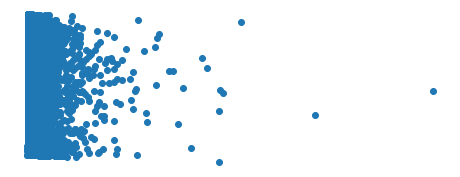

In [528]:
print('Cluster Graph with PCA ')

print(pca_80.explained_variance_ratio_)
plt.figure(figsize=(8,3))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## PCA with humansDeaths Features

First two PCA components:  [0.98823726 0.00322505]
Cluster Graph with PCA 


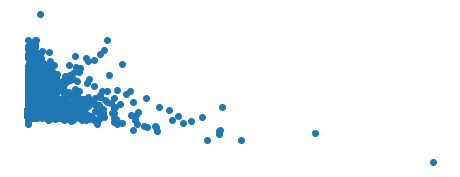

In [553]:
# PCA for features with greater than 0.01 absolute correlation with potential target

X_hd = X[['norm_humansDeaths_std', 'norm_humansAffected_std','Poland','African swine fever',
          'norm_sumSlaughtered_std','Europe','Romania','norm_sumDestroyed_std','wild', 'domestic', '8',
          'norm_humansAge_std','birds','mammals','France','Africa','Bluetongue','Foot and mouth disease',
            'Asia','unspecified','Latvia','Albania','Influenza - Avian','norm_sumDeaths','UnknownSerotypes',
          'Newcastle disease', 'Americas', 'O', 'H7N9 LPAI','Israel', 'Anthrax','4','H5N3 HPAI', 'Serbia',
          'Sheep pox and goat pox','West Nile Fever','Mongolia','observationFirstHalfMonth',
           'Lumpy skin disease','H5N2 LPAI','H5N1 HPAI','South Africa','Greece','United States of America',
         'Equine infectious anaemia','Centroid Locality','SAT2', 'Belgium','Namibia','Brazil','norm_sumCases_std']]

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_hd)
print('First two PCA components: ', pca.explained_variance_ratio_)


print('Cluster Graph with PCA ')
plt.figure(figsize=(8,3))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## TSNE with All Variables

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 5831 samples in 0.215s...
[t-SNE] Computed neighbors for 5831 samples in 3.708s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5831
[t-SNE] Computed conditional probabilities for sample 2000 / 5831
[t-SNE] Computed conditional probabilities for sample 3000 / 5831
[t-SNE] Computed conditional probabilities for sample 4000 / 5831
[t-SNE] Computed conditional probabilities for sample 5000 / 5831
[t-SNE] Computed conditional probabilities for sample 5831 / 5831
[t-SNE] Mean sigma: 1.654899
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.598785
[t-SNE] KL divergence after 300 iterations: 2.871150
Cluster Graph with t-SNE with Perplexity  10


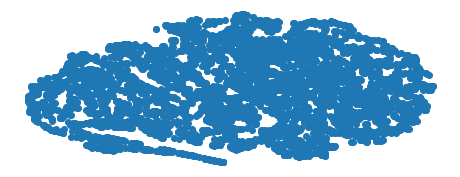

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 5831 samples in 0.191s...
[t-SNE] Computed neighbors for 5831 samples in 4.114s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5831
[t-SNE] Computed conditional probabilities for sample 2000 / 5831
[t-SNE] Computed conditional probabilities for sample 3000 / 5831
[t-SNE] Computed conditional probabilities for sample 4000 / 5831
[t-SNE] Computed conditional probabilities for sample 5000 / 5831
[t-SNE] Computed conditional probabilities for sample 5831 / 5831
[t-SNE] Mean sigma: 1.932616
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.658775
[t-SNE] KL divergence after 300 iterations: 2.452583
Cluster Graph with t-SNE with Perplexity  20


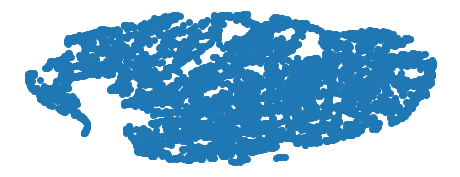

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5831 samples in 0.257s...
[t-SNE] Computed neighbors for 5831 samples in 6.228s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5831
[t-SNE] Computed conditional probabilities for sample 2000 / 5831
[t-SNE] Computed conditional probabilities for sample 3000 / 5831
[t-SNE] Computed conditional probabilities for sample 4000 / 5831
[t-SNE] Computed conditional probabilities for sample 5000 / 5831
[t-SNE] Computed conditional probabilities for sample 5831 / 5831
[t-SNE] Mean sigma: 2.098618
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.949265
[t-SNE] KL divergence after 300 iterations: 2.207418
Cluster Graph with t-SNE with Perplexity  30


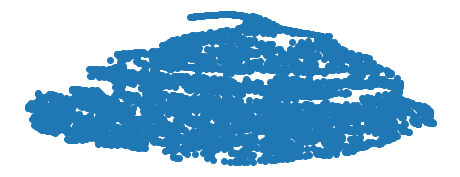

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5831 samples in 0.092s...
[t-SNE] Computed neighbors for 5831 samples in 3.794s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5831
[t-SNE] Computed conditional probabilities for sample 2000 / 5831
[t-SNE] Computed conditional probabilities for sample 3000 / 5831
[t-SNE] Computed conditional probabilities for sample 4000 / 5831
[t-SNE] Computed conditional probabilities for sample 5000 / 5831
[t-SNE] Computed conditional probabilities for sample 5831 / 5831
[t-SNE] Mean sigma: 2.222910
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.677322
[t-SNE] KL divergence after 300 iterations: 2.023363
Cluster Graph with t-SNE with Perplexity  40


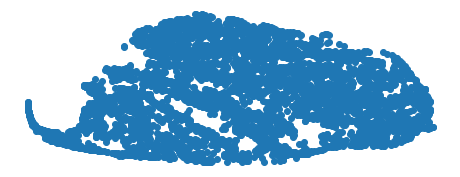

In [353]:
for perplexity in [10, 20, 30, 40]:
    tsne = TSNE(n_components=2, verbose=1, perplexity=perplexity, n_iter=300)
    tsne_results = tsne.fit_transform(X_all)
    print('Cluster Graph with t-SNE with Perplexity ', perplexity)
    plt.figure(figsize=(8,3))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

## TSNE with Top 50 Correlated Variables with humansDeaths

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 5831 samples in 0.041s...
[t-SNE] Computed neighbors for 5831 samples in 1.303s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5831
[t-SNE] Computed conditional probabilities for sample 2000 / 5831
[t-SNE] Computed conditional probabilities for sample 3000 / 5831
[t-SNE] Computed conditional probabilities for sample 4000 / 5831
[t-SNE] Computed conditional probabilities for sample 5000 / 5831
[t-SNE] Computed conditional probabilities for sample 5831 / 5831
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.493126
[t-SNE] KL divergence after 300 iterations: 2.475347
Cluster Graph with t-SNE with Perplexity  10


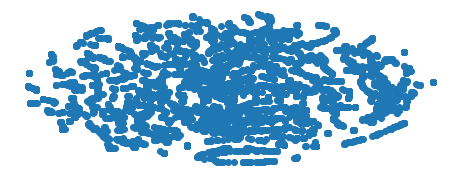

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 5831 samples in 0.035s...
[t-SNE] Computed neighbors for 5831 samples in 1.062s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5831
[t-SNE] Computed conditional probabilities for sample 2000 / 5831
[t-SNE] Computed conditional probabilities for sample 3000 / 5831
[t-SNE] Computed conditional probabilities for sample 4000 / 5831
[t-SNE] Computed conditional probabilities for sample 5000 / 5831
[t-SNE] Computed conditional probabilities for sample 5831 / 5831
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.787575
[t-SNE] KL divergence after 300 iterations: 2.064202
Cluster Graph with t-SNE with Perplexity  20


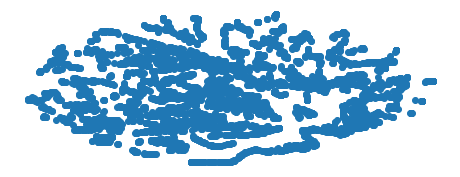

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5831 samples in 0.069s...
[t-SNE] Computed neighbors for 5831 samples in 1.619s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5831
[t-SNE] Computed conditional probabilities for sample 2000 / 5831
[t-SNE] Computed conditional probabilities for sample 3000 / 5831
[t-SNE] Computed conditional probabilities for sample 4000 / 5831
[t-SNE] Computed conditional probabilities for sample 5000 / 5831
[t-SNE] Computed conditional probabilities for sample 5831 / 5831
[t-SNE] Mean sigma: 0.974702
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.514526
[t-SNE] KL divergence after 300 iterations: 1.823921
Cluster Graph with t-SNE with Perplexity  30


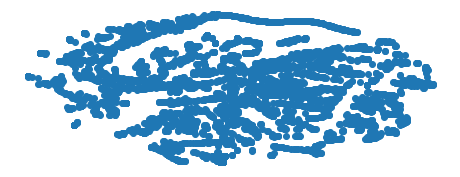

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5831 samples in 0.048s...
[t-SNE] Computed neighbors for 5831 samples in 1.776s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5831
[t-SNE] Computed conditional probabilities for sample 2000 / 5831
[t-SNE] Computed conditional probabilities for sample 3000 / 5831
[t-SNE] Computed conditional probabilities for sample 4000 / 5831
[t-SNE] Computed conditional probabilities for sample 5000 / 5831
[t-SNE] Computed conditional probabilities for sample 5831 / 5831
[t-SNE] Mean sigma: 1.067390
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.668068
[t-SNE] KL divergence after 300 iterations: 1.680539
Cluster Graph with t-SNE with Perplexity  40


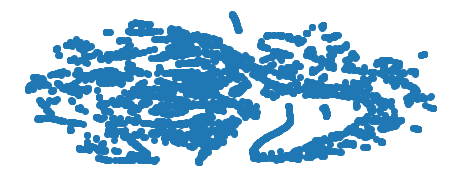

In [355]:
for perplexity in [10, 20, 30, 40]:
    tsne = TSNE(n_components=2, verbose=1, perplexity=perplexity, n_iter=300)
    tsne_results = tsne.fit_transform(X_hd)
    print('Cluster Graph with t-SNE with Perplexity ', perplexity)
    plt.figure(figsize=(8,3))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

## UMAP with All Features

UMAP with all features. 

UMAP for X_all with  5 neighbors and  0.1 minimum distance.


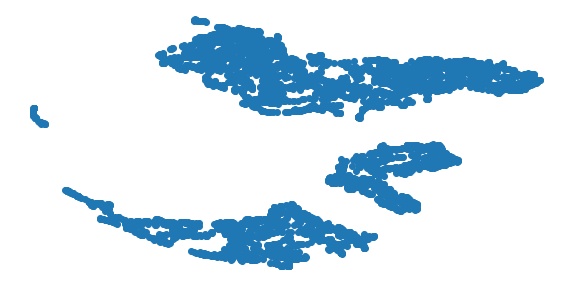



UMAP for X_all with  5 neighbors and  0.25 minimum distance.


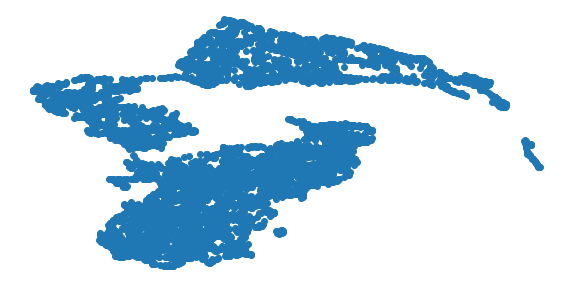



UMAP for X_all with  10 neighbors and  0.1 minimum distance.


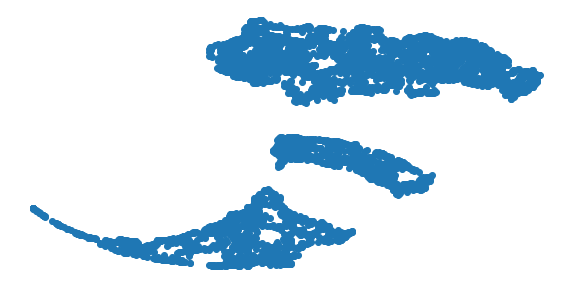



UMAP for X_all with  10 neighbors and  0.25 minimum distance.


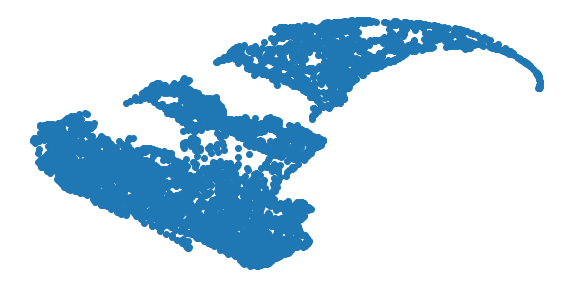

In [356]:
# UMAP with all features
print('UMAP with all features. \n')
for n_neighbors in [5, 10]:
    for min_dist in [0.1, 0.25]:
        umap_results = umap.UMAP(n_neighbors=n_neighbors,
                      min_dist=min_dist,
                      metric='correlation').fit_transform(X_all)
        print('UMAP for X_all with ', n_neighbors, 'neighbors and ', min_dist, 'minimum distance.')
        plt.figure(figsize=(10,5))
        plt.scatter(umap_results[:, 0], umap_results[:, 1])
        plt.xticks([])
        plt.yticks([])
        plt.axis('off')
        plt.show()
        print('\n')

## UMAP with Features Highly Correlated with humansDeaths

UMAP with  20 neighbors and  0.25 minimum distance.


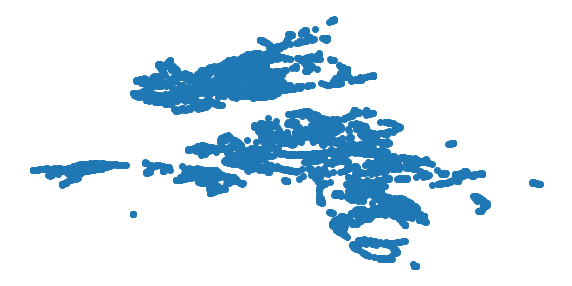



UMAP with  30 neighbors and  0.25 minimum distance.


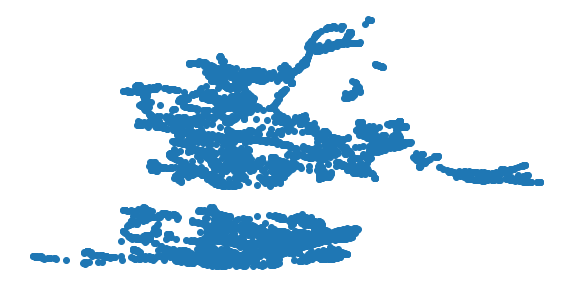



UMAP with  40 neighbors and  0.25 minimum distance.


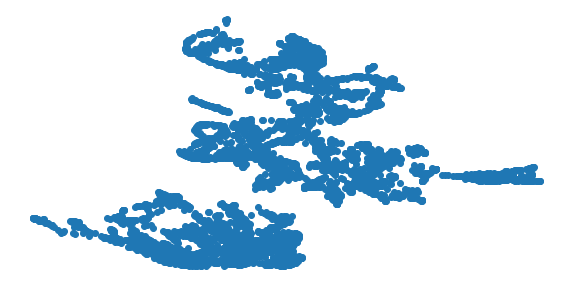

In [357]:
# UMAP with higher correlation with humansDeaths
for n_neighbors in [20, 30, 40]:
    for min_dist in [0.25]:
        umap_results = umap.UMAP(n_neighbors=n_neighbors,
                      min_dist=min_dist,
                      metric='correlation').fit_transform(X_hd)
        print('UMAP with ', n_neighbors, 'neighbors and ', min_dist, 'minimum distance.')
        plt.figure(figsize=(10,5))
        plt.scatter(umap_results[:, 0], umap_results[:, 1])
        plt.xticks([])
        plt.yticks([])
        plt.axis('off')
        plt.show()
        print('\n')

## LLE 

LLE with  5 neighbors and two components.


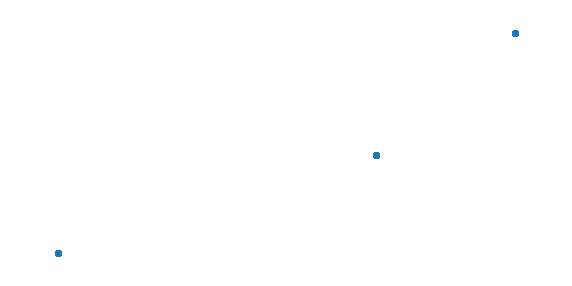



LLE with  10 neighbors and two components.


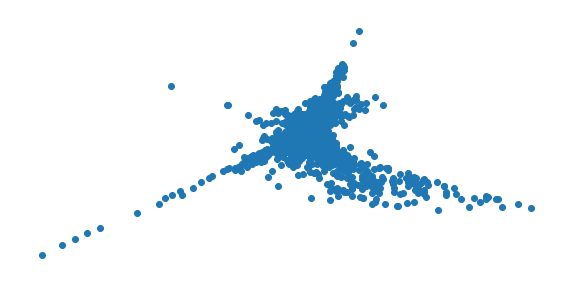



LLE with  25 neighbors and two components.


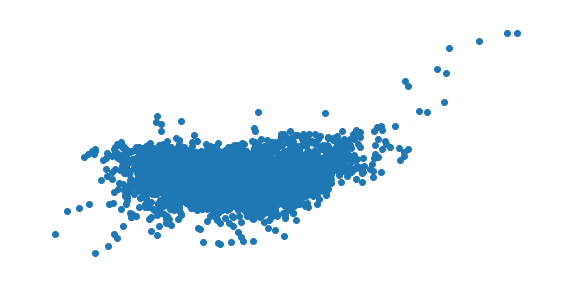



LLE with  50 neighbors and two components.


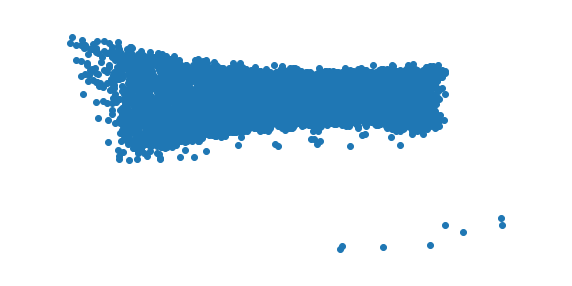

In [196]:
# LLE with all features
for n_neighbors in [5, 10, 25, 50]:
    lle_results = LocallyLinearEmbedding(n_components=2, 
                    n_neighbors=n_neighbors,
                    eigen_solver='dense').fit_transform(X_all)
    print('LLE with ', n_neighbors, 'neighbors and two components.')
    plt.figure(figsize=(10,5))
    plt.scatter(lle_results[:, 0], lle_results[:, 1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()
    print('\n')


LLE with  5 neighbors and two components.


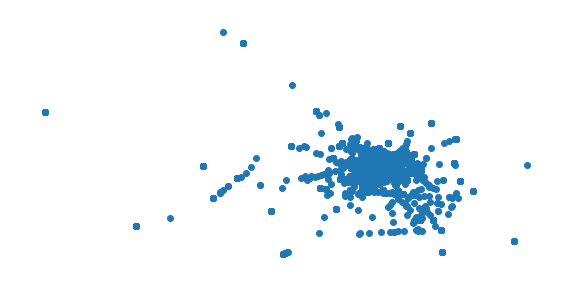



LLE with  10 neighbors and two components.


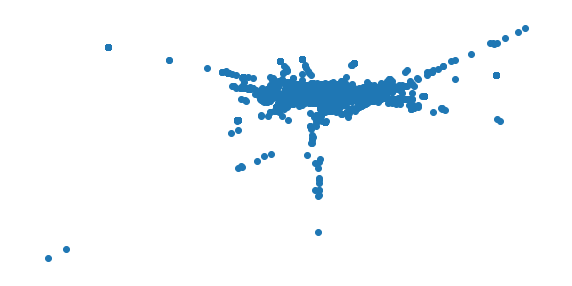



LLE with  25 neighbors and two components.


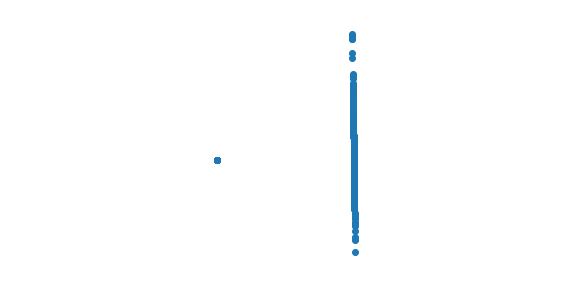



LLE with  50 neighbors and two components.


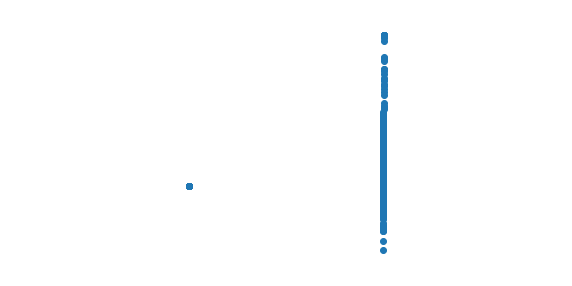

In [197]:
# LLE with all float features
for n_neighbors in [5, 10, 25, 50]:
    lle_results = LocallyLinearEmbedding(n_components=2, 
                    n_neighbors=n_neighbors,
                    eigen_solver='dense').fit_transform(X_hd)
    print('LLE with ', n_neighbors, 'neighbors and two components.')
    plt.figure(figsize=(10,5))
    plt.scatter(lle_results[:, 0], lle_results[:, 1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()
    print('\n')

# Functions to Add Cluster Labels

In [358]:
# Get a list of keys from dictionary which has the given value

def getKeysByValue(dictOfElements, valueToFind):
    listOfKeys = list()
    listOfItems = dictOfElements.items()
    for item  in listOfItems:
        if item[1] == valueToFind:
            listOfKeys.append(item[0])
    return  listOfKeys

import operator

def get_pvalue_2clusters(variables):
    variables_pvalues = {}
    for variable in variables:
        t, pvalue = stats.ttest_ind(group_0[[variable]], group_1[[variable]])
        variables_pvalues[variable] = pvalue
    sorted_variables_pvalues = sorted(variables_pvalues.items(), key=operator.itemgetter(1))
    for variable, pvalue in sorted_variables_pvalues:
        print(variable, ':', pvalue)

def get_pvalue_3clusters(variables):
    variables_pvalues = {}
    for variable in variables:
        stat, pvalue = stats.f_oneway(group_0[[variable]], group_1[[variable]], group_2[[variable]])
        variables_pvalues[variable] = pvalue
    sorted_variables_pvalues = sorted(variables_pvalues.items(), key=operator.itemgetter(1))
    for variable, pvalue in sorted_variables_pvalues:
        print(variable, ':', pvalue)


# Clustering

## K-means Function

In [530]:
def kmeans_clustering(df, dr_technique, **params):
    clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    silhouettes_list = []
    silhouettes_dict = {} # silhoutte scores are keys, clusters are values
    dbs = []      
       
   
    if dr_technique=='PCA':
        pca = PCA(n_components=2)
        components = pca.fit_transform(df)
       
    elif dr_technique=='UMAP': 
        parameters = list(params.keys())
        number_of_neighbors = params[parameters[0]]
        min_distance = params[parameters[1]]
        components = umap.UMAP(n_neighbors=number_of_neighbors, min_dist=min_distance, metric='correlation').fit_transform(df)

    # looping through cluster numbers to find the best cluster
    for cluster in clusters:
        labels = KMeans(n_clusters=cluster, random_state=123).fit_predict(components)
        kmeans_cluster = KMeans(n_clusters=cluster, random_state=123)
        y_pred = kmeans_cluster.fit_predict(components)
        silhouette = metrics.silhouette_score(components, labels, metric='euclidean')
        silhouettes_list.append(silhouette)
        silhouettes_dict[cluster] = silhouette
        db = metrics.davies_bouldin_score(components, labels)
        dbs.append(db)

    # plotting the silhouette scores
    plt.title('Silhouette Scores for Number of Clusters')  
    plt.scatter(list(silhouettes_dict.keys()), list(silhouettes_dict.values()))
    plt.show()


    best_cluster = getKeysByValue(silhouettes_dict, max(silhouettes_list))
    best_cluster_dbi = metrics.davies_bouldin_score(components,  KMeans(n_clusters=best_cluster[0], random_state=123).fit_predict(components))
    print('Best Silhouette score is {} with {} clusters. '.format( silhouettes_dict[best_cluster[0]],best_cluster[0]))
    print('Best Davies Bouldin score: ', min(dbs))   
    # plotting the clusters with the best silhouette score
    labels = KMeans(n_clusters=best_cluster[0], random_state=123).fit_predict(components)
    kmeans_cluster = KMeans(n_clusters=best_cluster[0], random_state=123)
    y_pred = kmeans_cluster.fit_predict(components)
       
    plt.title('K-Means Clustering for {} Clusters with Davies Bouldin Index {}'.format(best_cluster[0], best_cluster_dbi))
    plt.scatter(components[:,0], components[:,1], c=y_pred)
    plt.show()
    



## K-Means with PCA Components for all features

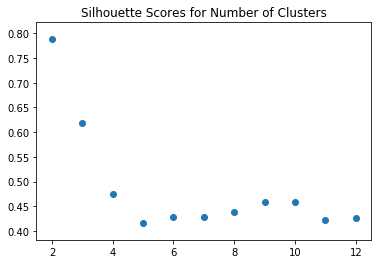

Best Silhouette score is 0.7884521879014621 with 2 clusters. 
Best Davies Bouldin score:  0.5958888202644813


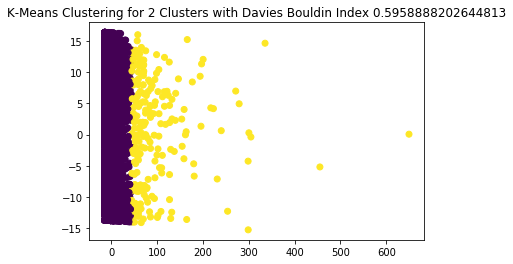

In [531]:
kmeans_clustering(X_all, 'PCA')

## K-Means using PCA for features with high correlations with humansDeaths

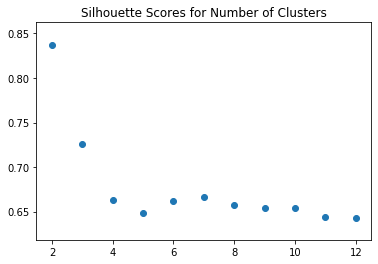

Best Silhouette score is 0.8375601424339016 with 2 clusters. 
Best Davies Bouldin score:  0.43401288618692796


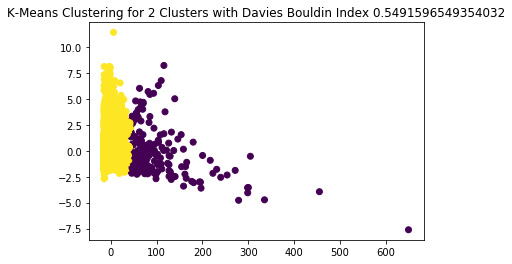

In [374]:
kmeans_clustering(X_hd, 'PCA')

## K-Means using UMAP for all features

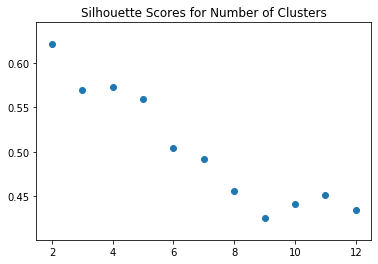

Best Silhouette score is 0.6209039092063904 with 2 clusters. 
Best Davies Bouldin score:  0.5765824737979379


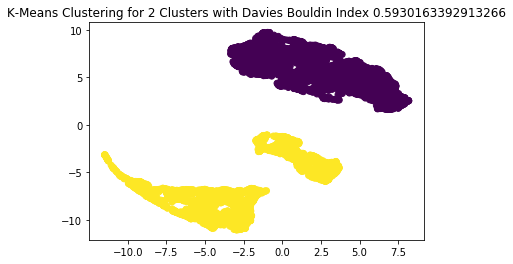

In [375]:
kmeans_clustering(X_all, 'UMAP', neighbors=10, min_distance=0.1)

## K-Means using UMAP for features with high correlations with humansDeaths

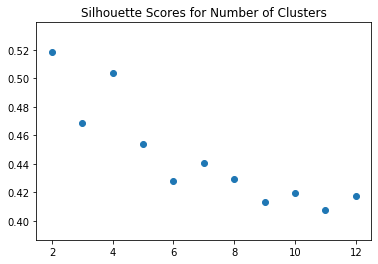

Best Silhouette score is 0.5185441970825195 with 2 clusters. 
Best Davies Bouldin score:  0.6750282641104685


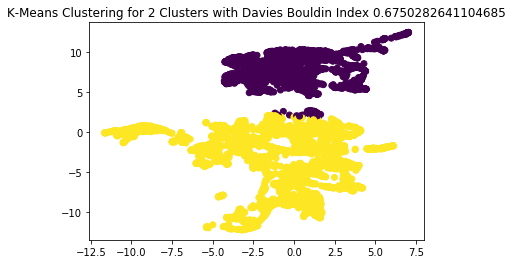

In [532]:
kmeans_clustering(X_hd, 'UMAP', neighbors=30, min_distance=0.25)

# P-Values for Labeled Features

In [554]:
# K-means with humansDeaths features

pca = PCA(n_components=2)
components = pca.fit_transform(X_hd)

labels = KMeans(n_clusters=2, random_state=123).fit_predict(components)
print(X.shape)
print(len(labels))
unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique, counts)))
X['X_hd_pca_kmeans_clusters'] = labels
group_0 = X[X['X_hd_pca_kmeans_clusters'] == 0]
group_1 = X[X['X_hd_pca_kmeans_clusters'] == 1]

get_pvalue_2clusters(X.columns)

(5831, 289)
5831
{0: 241, 1: 5590}
norm_sumCases : [0.]
norm_sumDeaths : [0.]
norm_sumCases_std : [0.]
X_hd_pca_kmeans_clusters : [0.]
sumDeaths : [7.25058468e-225]
sumCases : [1.24928268e-131]
norm_sumAtRisk_std : [1.06104481e-126]
norm_sumAtRisk : [1.06104481e-126]
sumAtRisk : [4.39273437e-124]
Influenza - Avian : [3.11824333e-89]
birds : [3.21533342e-87]
sumDestroyed : [8.60791427e-83]
Iraq : [2.85287392e-80]
mammals : [7.83324838e-72]
norm_sumDestroyed_std : [5.65412508e-67]
norm_sumDestroyed : [5.65412508e-67]
unspecified : [3.14554522e-57]
H7N9 LPAI : [2.86663167e-46]
UnknownSerotypes : [5.45268212e-45]
H7N9 HPAI : [8.5056321e-38]
H5N2 HPAI : [5.15513296e-37]
Taiwan (Province of China) : [1.06913826e-33]
Asia : [4.25600107e-31]
China : [3.48041906e-26]
Europe : [8.01838478e-21]
H5N8 HPAI : [8.51561056e-21]
norm_humansDeaths_std : [4.41794805e-18]
norm_humansDeaths : [4.41794805e-18]
norm_humansAffected : [2.06173997e-17]
norm_humansAffected_std : [2.06173997e-17]
Togo : [5.900977

In [555]:
def plot_hd_pca_kmeans_clusters():
    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_hd_pca_kmeans_clusters'], y=X['sumCases'])
    plt.title('K-Means Clusters vs sumCases (p-value = 5.73e-25)')
    box.set_ylim(0, 100000)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_hd_pca_kmeans_clusters'], y=X['sumDeaths'])
    plt.title('K-Means Clusters vs sumDeaths (p-value = 1.06e-18)')
    box.set_ylim(0, 50000)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_hd_pca_kmeans_clusters'], y=X['humansAffected'])
    plt.title('K-Means Clusters vs humansAffected (p-value = 2.19e-108)')
    box.set_ylim(0, 100)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_hd_pca_kmeans_clusters'], y=X['humansDeaths'])
    plt.title('K-Means Clusters vs humansDeaths (p-value = 7.25e-116)')
    box.set_ylim(0, 100)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_hd_pca_kmeans_clusters'], y=X['Africa'])
    plt.title('K-Means Clusters vs Africa (p-value = 4.74e-224)')
    # box.set_ylim(0, 250000)
    plt.show()


    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_hd_pca_kmeans_clusters'], y=X['wild'])
    plt.title('K-Means Clusters vs wild (p-value = 2.22e-159)')
# box.set_ylim(0, 250000)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_hd_pca_kmeans_clusters'], y=X['Asia'])
    plt.title('K-Means Clusters vs Asia (p-value = 0)')
    # box.set_ylim(0, 100000)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_hd_pca_kmeans_clusters'], y=X['Europe'])
    plt.title('K-Means Clusters vs Europe (p-value = 0)')
    # box.set_ylim(0, 250000)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_hd_pca_kmeans_clusters'], y=X['African swine fever'])
    plt.title('K-Means Clusters vs African swine fever (p-value = 0)')
    # box.set_ylim(0, 50000)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_hd_pca_kmeans_clusters'], y=X['Foot and mouth disease'])
    plt.title('K-Means Clusters vs Foot and mouth disease (p-value = 0)')
# box.set_ylim(0, 100)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_hd_pca_kmeans_clusters'], y=X['Influenza - Avian'])
    plt.title('K-Means Clusters vs Influenza - Avian (p-value = 0)')
# box.set_ylim(0, 100)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_hd_pca_kmeans_clusters'], y=X['UnknownSerotypes'])
    plt.title('K-Means Clusters vs UnknownSerotypes (p-value = 0)')
# box.set_ylim(0, 500)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_hd_pca_kmeans_clusters'], y=X['birds'])
    plt.title('K-Means Clusters vs birds (p-value = 0)')
# box.set_ylim(0, 10)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_hd_pca_kmeans_clusters'], y=X['mammals'])
    plt.title('K-Means Clusters vs mammals (p-value = 0)')
# box.set_ylim(0, 10)
    plt.show()

    plt.figure(figsize=(10,3))
    sns.boxenplot(x=X['X_hd_pca_kmeans_clusters'], y=X['Americas'])
    plt.title('K-Means Clusters vs Americas (p-value = 6.63e-30)')
# scatterplot.set_ylim(0, 600)
    plt.show()



## K-Means Cluster Labels (humansDeaths features, PCA components)

- cluster 0: sumCases, sumDeaths, humansAffected, humansDeaths share clusters
- cluster 1: wild, Europe, African Swine Fever, Foot and Mouth Disease, Influenza - Avian, Unknown Serotypes, birds, mammals
- separation: unknown?

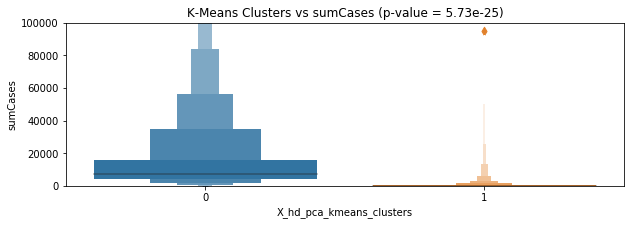

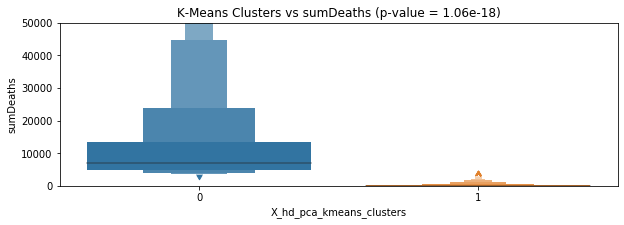

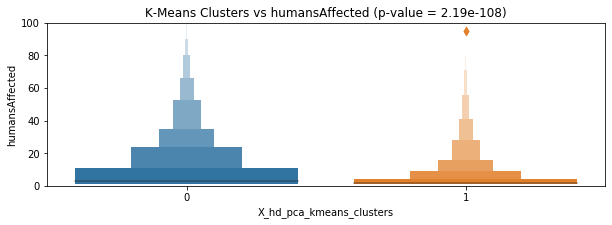

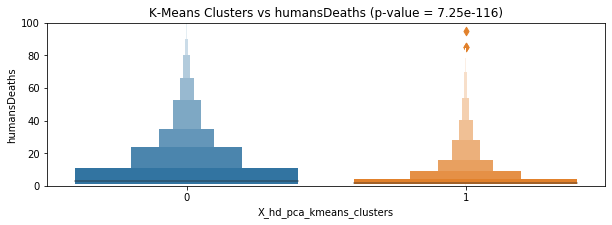

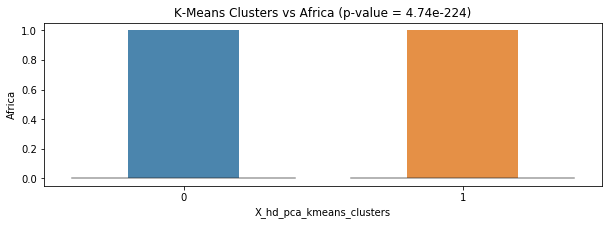

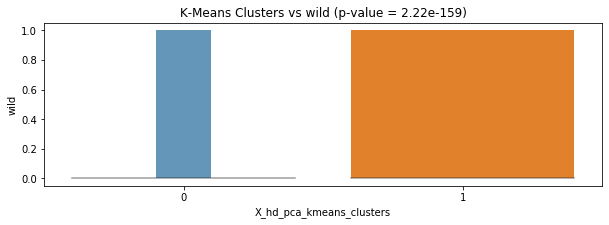

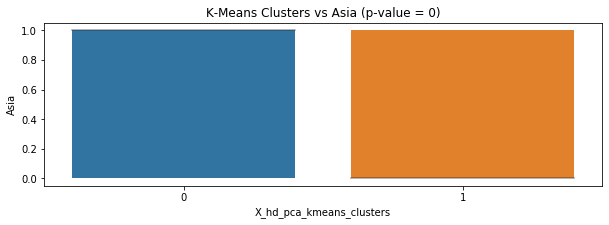

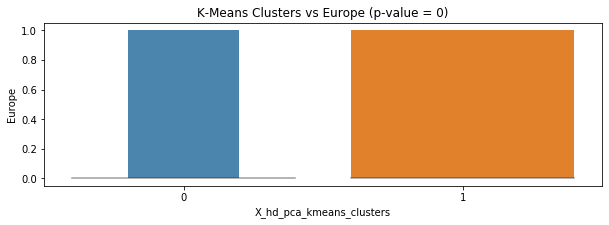

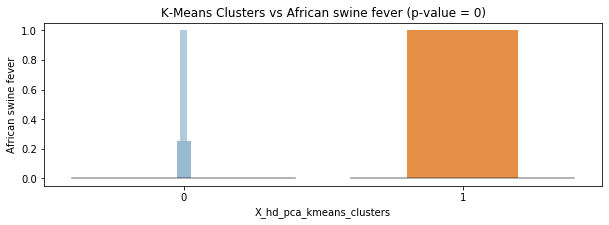

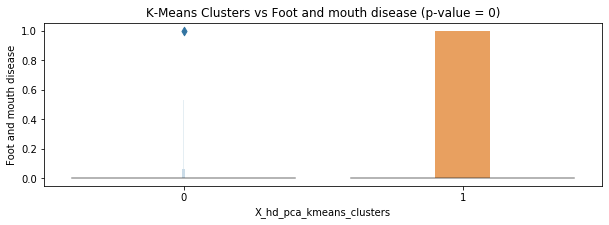

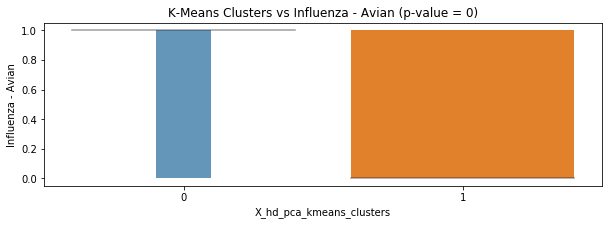

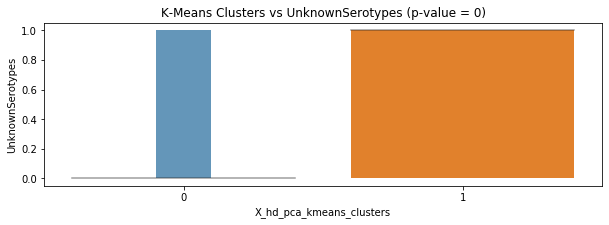

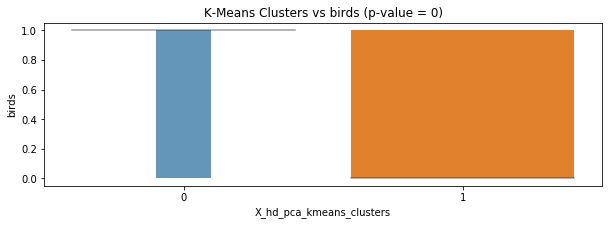

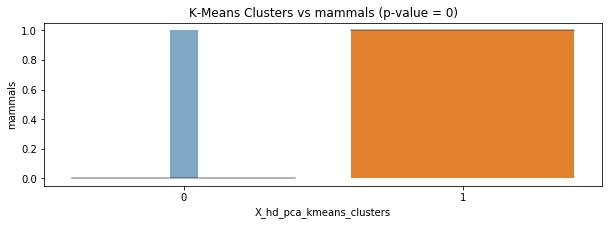

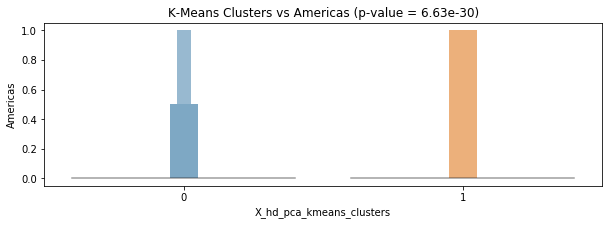

In [556]:

plot_hd_pca_kmeans_clusters()

In [557]:
# K-means with all features with UMAP components

umap_results = umap.UMAP(n_neighbors=10,
                      min_dist=0.1,
                      metric='correlation').fit_transform(X_all)

labels = KMeans(n_clusters=2, random_state=123).fit_predict(umap_results)
print(X.shape)
print(len(labels))
unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique, counts)))
X['X_all_umap_kmeans_clusters'] = labels
group_0 = X[X['X_all_umap_kmeans_clusters'] == 0]
group_1 = X[X['X_all_umap_kmeans_clusters'] == 1]

get_pvalue_2clusters(X.columns)

(5831, 290)
5831
{0: 2496, 1: 3335}
norm_sumDeaths : [0.]
norm_sumDestroyed : [0.]
norm_sumDestroyed_std : [0.]
X_all_umap_kmeans_clusters : [0.]
norm_sumSlaughtered : [3.25543178e-233]
norm_sumSlaughtered_std : [3.25543178e-233]
norm_sumCases_std : [5.7361812e-186]
norm_sumCases : [5.7361812e-186]
Europe : [1.07940143e-171]
Asia : [1.40835082e-162]
OIE : [5.09195701e-133]
mammals : [6.59473756e-129]
National authorities : [3.47863545e-110]
wild : [3.12955223e-82]
X_hd_pca_kmeans_clusters : [3.47011472e-77]
Influenza - Avian : [5.08993324e-74]
MERS-CoV  : [5.9851278e-74]
African swine fever : [5.84489845e-73]
Saudi Arabia : [2.33169769e-67]
humansAge : [1.88063054e-60]
Centroid Admin1 : [8.39409385e-52]
norm_sumAtRisk : [8.91880258e-52]
norm_sumAtRisk_std : [8.91880258e-52]
H5N1 HPAI : [2.29340179e-51]
birds : [6.89730496e-50]
UnknownSerotypes : [4.2824781e-46]
Centroid Admin2 : [2.29809708e-42]
norm_humansAge_std : [1.69741627e-38]
norm_humansAge : [1.69741627e-38]
H7N9 LPAI : [4.9043

In [559]:
def plot_all_umap_kmeans_clusters():
    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_all_umap_kmeans_clusters'], y=X['sumCases'])
    plt.title('K-Means Clusters vs sumCases (p-value = 5.73e-25)')
    box.set_ylim(0, 100000)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_all_umap_kmeans_clusters'], y=X['sumDeaths'])
    plt.title('K-Means Clusters vs sumDeaths (p-value = 1.06e-18)')
    box.set_ylim(0, 50000)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_all_umap_kmeans_clusters'], y=X['humansAffected'])
    plt.title('K-Means Clusters vs humansAffected (p-value = 2.19e-108)')
    box.set_ylim(0, 100)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_all_umap_kmeans_clusters'], y=X['humansDeaths'])
    plt.title('K-Means Clusters vs humansDeaths (p-value = 7.25e-116)')
    box.set_ylim(0, 100)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_all_umap_kmeans_clusters'], y=X['Africa'])
    plt.title('K-Means Clusters vs Africa (p-value = 4.74e-224)')
    # box.set_ylim(0, 250000)
    plt.show()


    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_all_umap_kmeans_clusters'], y=X['wild'])
    plt.title('K-Means Clusters vs wild (p-value = 2.22e-159)')
# box.set_ylim(0, 250000)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_all_umap_kmeans_clusters'], y=X['Asia'])
    plt.title('K-Means Clusters vs Asia (p-value = 0)')
    # box.set_ylim(0, 100000)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_all_umap_kmeans_clusters'], y=X['Europe'])
    plt.title('K-Means Clusters vs Europe (p-value = 0)')
    # box.set_ylim(0, 250000)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_all_umap_kmeans_clusters'], y=X['African swine fever'])
    plt.title('K-Means Clusters vs African swine fever (p-value = 0)')
    # box.set_ylim(0, 50000)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_all_umap_kmeans_clusters'], y=X['Foot and mouth disease'])
    plt.title('K-Means Clusters vs Foot and mouth disease (p-value = 0)')
# box.set_ylim(0, 100)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_all_umap_kmeans_clusters'], y=X['Influenza - Avian'])
    plt.title('K-Means Clusters vs Influenza - Avian (p-value = 0)')
# box.set_ylim(0, 100)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_all_umap_kmeans_clusters'], y=X['UnknownSerotypes'])
    plt.title('K-Means Clusters vs UnknownSerotypes (p-value = 0)')
# box.set_ylim(0, 500)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_all_umap_kmeans_clusters'], y=X['birds'])
    plt.title('K-Means Clusters vs birds (p-value = 0)')
# box.set_ylim(0, 10)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_all_umap_kmeans_clusters'], y=X['mammals'])
    plt.title('K-Means Clusters vs mammals (p-value = 0)')
# box.set_ylim(0, 10)
    plt.show()

    plt.figure(figsize=(10,3))
    sns.boxenplot(x=X['X_all_umap_kmeans_clusters'], y=X['Americas'])
    plt.title('K-Means Clusters vs Americas (p-value = 6.63e-30)')
# scatterplot.set_ylim(0, 600)
    plt.show()



## K-Means Cluster Labels (All features, UMAP components)

- sumCases & sumDeaths / humansAffected & humansDeaths
- cluster 0: Asia
- cluster 1: African Swine Fever, Influenza - Avian

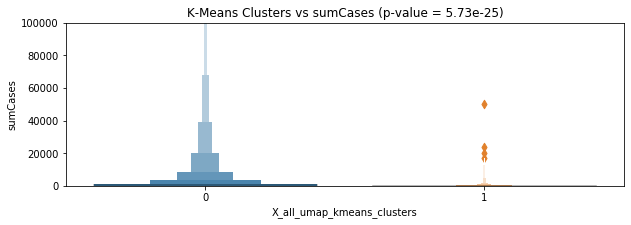

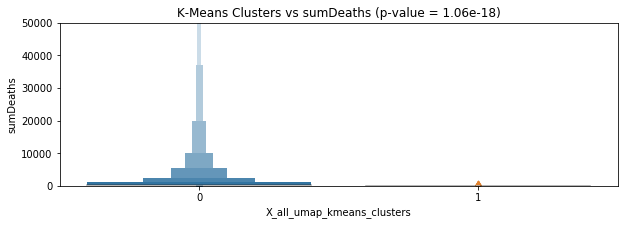

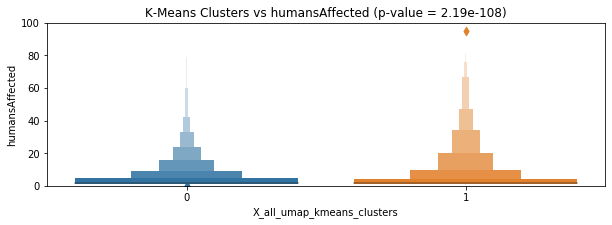

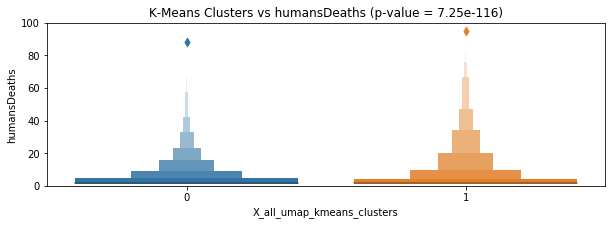

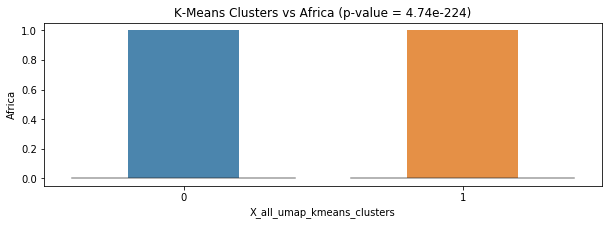

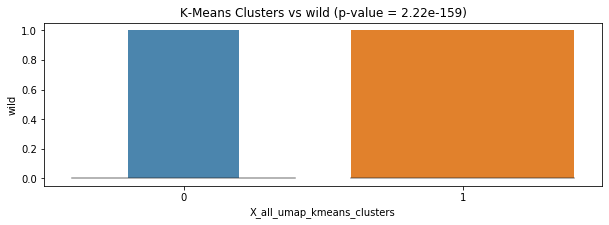

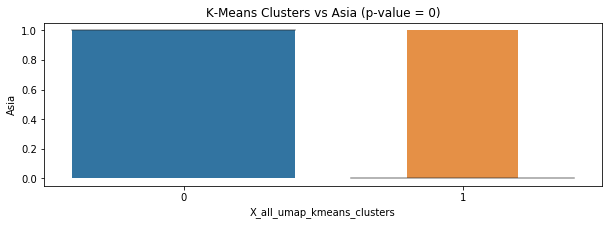

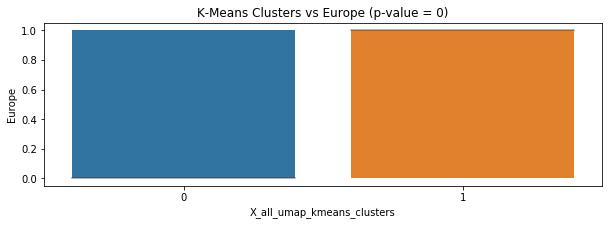

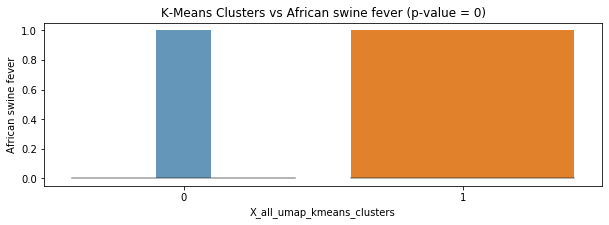

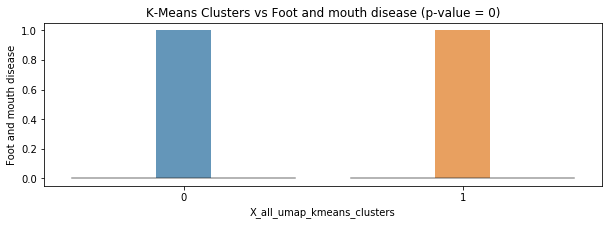

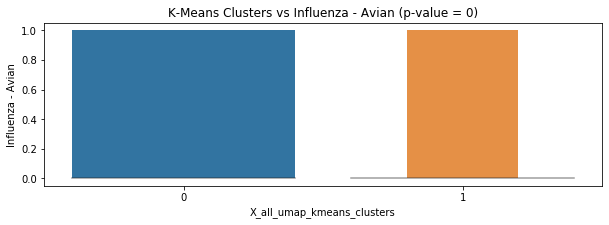

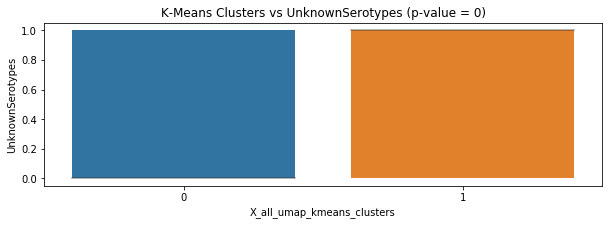

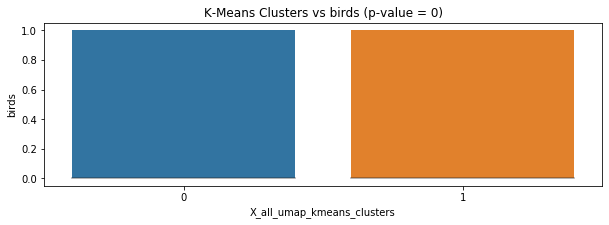

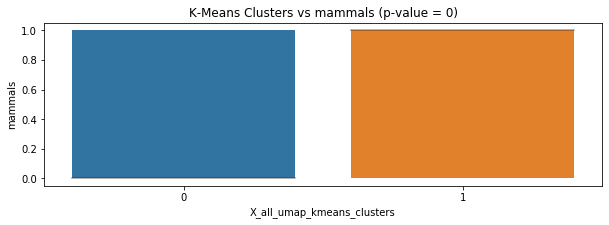

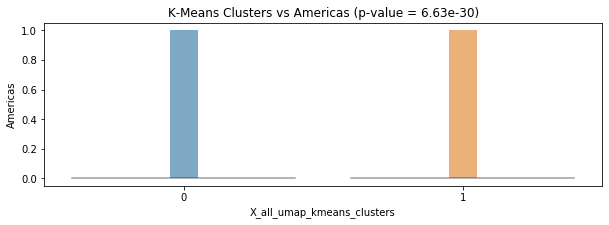

In [560]:
plot_all_umap_kmeans_clusters()

## Agglomerative Clustering for all features with PCA Components

In [386]:
def agglomerative_clustering(df, dr_technique, **params):
    clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    dbs = []      
       

    if dr_technique=='PCA':
        pca = PCA(n_components=2)
        components = pca.fit_transform(df)
       
    elif dr_technique=='UMAP': 
        parameters = list(params.keys())
        number_of_neighbors = params[parameters[0]]
        min_distance = params[parameters[1]]
        components = umap.UMAP(n_neighbors=number_of_neighbors, min_dist=min_distance, metric='correlation').fit_transform(df)

    # looping through cluster numbers to find the best cluster
    silhouettes_ward = {} # clusters are keys, silhoutte scores are values
    silhouettes_ward_list = []
    for cluster in clusters:
        agg_cluster = AgglomerativeClustering(linkage='ward',
                                      affinity='euclidean',
                                      n_clusters=cluster)
        labels = agg_cluster.fit_predict(components)
        silhouette = metrics.silhouette_score(components, labels, metric='euclidean')
        silhouettes_ward_list.append(silhouette)
        silhouettes_ward[cluster] = silhouette
        db = metrics.davies_bouldin_score(components, labels)
        dbs.append(db)
        
     
    silhouettes_complete = {} # silhoutte scores are keys, clusters are values
    silhouettes_complete_list = []
    for cluster in clusters:
        agg_cluster = AgglomerativeClustering(linkage='complete',
                                      affinity='euclidean',
                                      n_clusters=cluster)
        labels = agg_cluster.fit_predict(components)
        silhouette = metrics.silhouette_score(components, labels, metric='euclidean')
        silhouettes_complete_list.append(silhouette)
        silhouettes_complete[cluster] = silhouette
        db = metrics.davies_bouldin_score(components, labels)
        dbs.append(db)
       
    silhouettes_average = {} # silhoutte scores are keys, clusters are values
    silhouettes_average_list = []
    for cluster in clusters:
        agg_cluster = AgglomerativeClustering(linkage='average',
                                      affinity='euclidean',
                                      n_clusters=cluster)
        labels = agg_cluster.fit_predict(components)
        silhouette = metrics.silhouette_score(components, labels, metric='euclidean')
        silhouettes_average_list.append(silhouette)
        silhouettes_average[cluster] = silhouette
        db = metrics.davies_bouldin_score(components, labels)
        dbs.append(db)
       
    best_ward_cluster = getKeysByValue(silhouettes_ward, max(silhouettes_ward_list))
    best_ward_cluster = best_ward_cluster[0]
    best_complete_cluster = getKeysByValue(silhouettes_complete, max(silhouettes_complete_list))
    best_complete_cluster = best_complete_cluster[0]
    best_average_cluster = getKeysByValue(silhouettes_average, max(silhouettes_average_list))
    best_average_cluster = best_average_cluster[0]
    # plotting the silhouette scores
    plt.title('Silhouette Scores for Number of Clusters')  
    plt.scatter(list(silhouettes_ward.keys()), list(silhouettes_ward.values()), color='blue')
    plt.scatter(list(silhouettes_complete.keys()), list(silhouettes_complete.values()), color='green')
    plt.scatter(list(silhouettes_average.keys()), list(silhouettes_average.values()), color='red')
    plt.show()

    print('Best Silhouette score with ward linkage is {} with {} clusters. '.format(silhouettes_ward[best_ward_cluster], best_ward_cluster))
    print('Best Silhouette score with complete linkage is {} with {} clusters. '.format(silhouettes_complete[best_complete_cluster], best_complete_cluster))
    print('Best Silhouette score with average linkage is {} with {} clusters. '.format(silhouettes_average[best_average_cluster], best_average_cluster))
    print('Best Davies Bouldin score: ', min(dbs))
        


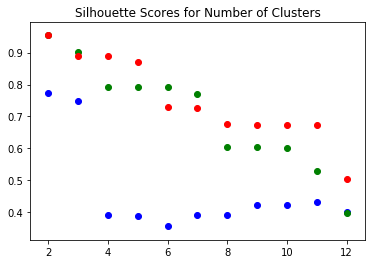

Best Silhouette score with ward linkage is 0.7730616369969872 with 2 clusters. 
Best Silhouette score with complete linkage is 0.9546866611146686 with 2 clusters. 
Best Silhouette score with average linkage is 0.9546866611146686 with 2 clusters. 
Best Davies Bouldin score:  0.20654770386665489


In [387]:
agglomerative_clustering(X_all, 'PCA')

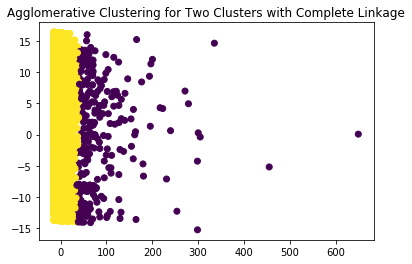

Silhouette Score:  0.7730616369969872
Davies Bouldin Index:  0.6211473325824834


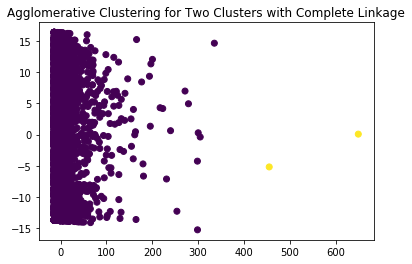

Silhouette Score:  0.9546866611146686
Davies Bouldin Index:  0.20654770386665494


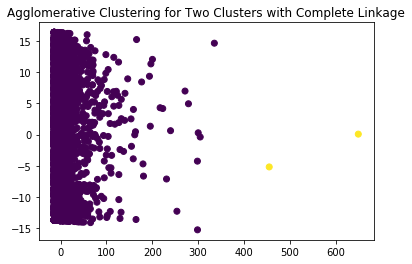

Silhouette Score:  0.9546866611146686
Davies Bouldin Index:  0.20654770386665514


In [388]:
# plotting the clusters with the best silhouette score
for link in ['ward', 'complete', 'average']:
    pca = PCA(n_components=2)
    pca_components = pca.fit_transform(X_all)
    agg_cluster = AgglomerativeClustering(linkage=link, 
                                      affinity='euclidean',
                                      n_clusters=2)
    cluster_labels = agg_cluster.fit_predict(pca_components)

    plt.title('Agglomerative Clustering for Two Clusters with Complete Linkage')
    plt.scatter(pca_components[:,0], pca_components[:,1], c=cluster_labels)
    plt.show()

    print('Silhouette Score: ', metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean'))
    print('Davies Bouldin Index: ', metrics.davies_bouldin_score(pca_components, cluster_labels))

## Agglomerative Clustering for humansDeaths features with PCA Components

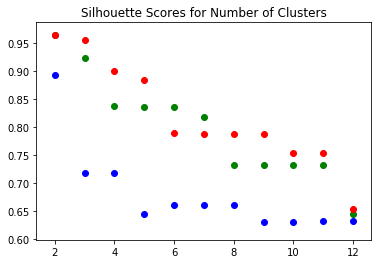

Best Silhouette score with ward linkage is 0.8915601536050288 with 2 clusters. 
Best Silhouette score with complete linkage is 0.9633378764307332 with 2 clusters. 
Best Silhouette score with average linkage is 0.9633378764307332 with 2 clusters. 
Best Davies Bouldin score:  0.027339391344966494


In [389]:
agglomerative_clustering(X_hd, 'PCA')

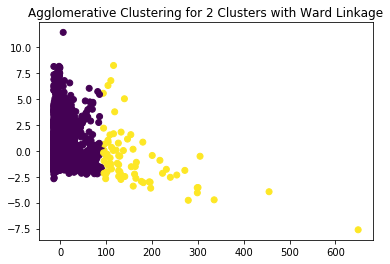

Silhouette Score:  0.8915601536050273
Davies Bouldin Index:  0.4394451418631647


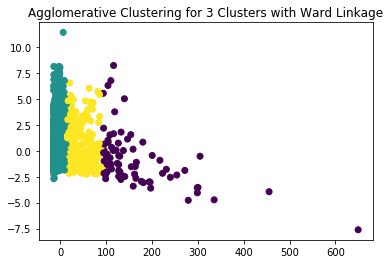

Silhouette Score:  0.7172086272354198
Davies Bouldin Index:  0.5721260887563365


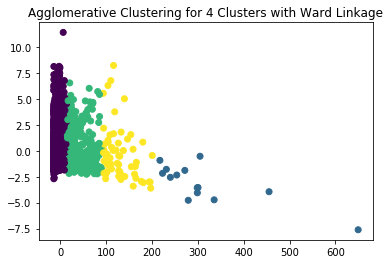

Silhouette Score:  0.7175460952238657
Davies Bouldin Index:  0.5377150907524981


In [394]:
# plotting the clusters with the best silhouette score
for cluster in [2,3,4]:
    pca = PCA(n_components=2)
    pca_components = pca.fit_transform(X_hd)
    agg_cluster = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=cluster)
    cluster_labels = agg_cluster.fit_predict(pca_components)

    plt.title('Agglomerative Clustering for {} Clusters with Ward Linkage'.format(cluster))
    plt.scatter(pca_components[:,0], pca_components[:,1], c=cluster_labels)
    plt.show()

    print('Silhouette Score: ', metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean'))
    print('Davies Bouldin Index: ', metrics.davies_bouldin_score(pca_components, cluster_labels))

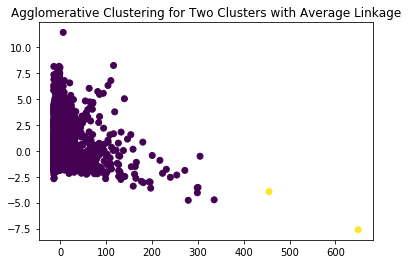

Silhouette Score:  0.9633378764307324
Davies Bouldin Index:  0.20088008473530025


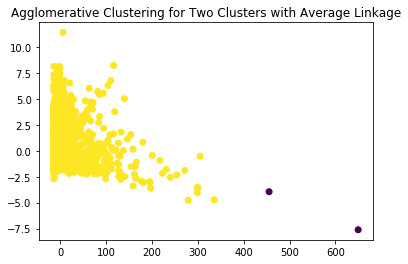

Silhouette Score:  0.9633378764307324
Davies Bouldin Index:  0.20088008473530025


In [395]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_hd)

# plotting the clusters with the best silhouette score with average linkage
linkages = ['complete', 'average']

for link in linkages:
    agg_cluster = AgglomerativeClustering(linkage=link, 
                                      affinity='euclidean',
                                      n_clusters=2)
    cluster_labels = agg_cluster.fit_predict(pca_components)

    plt.title('Agglomerative Clustering for Two Clusters with Average Linkage')
    plt.scatter(pca_components[:,0], pca_components[:,1], c=cluster_labels)
    plt.show()

    print('Silhouette Score: ', metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean'))
    print('Davies Bouldin Index: ', metrics.davies_bouldin_score(pca_components, cluster_labels))



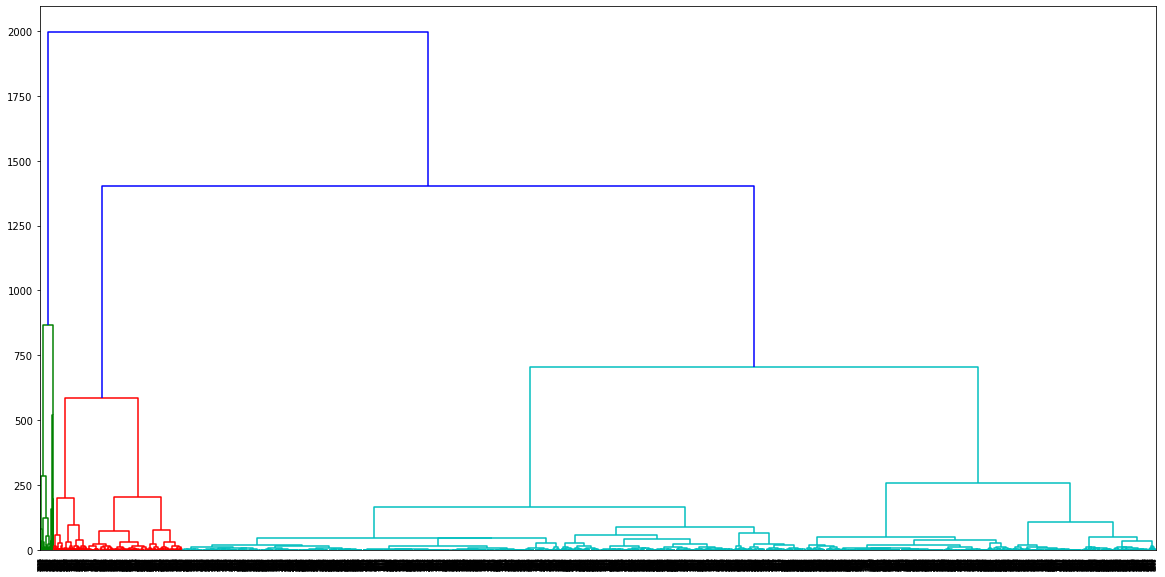

In [537]:
pca_components = pca.fit_transform(X_hd)
agg_cluster = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=2)
clusters = agg_cluster.fit_predict(pca_components)

plt.figure(figsize=(20,10))
dendrogram(lnkg(pca_components, method='ward'))
plt.show()

## Agglomerative Clustering for All Features with UMAP Components

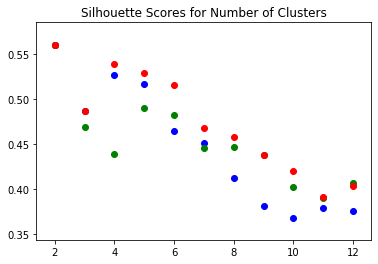

Best Silhouette score with ward linkage is 0.560408890247345 with 2 clusters. 
Best Silhouette score with complete linkage is 0.560408890247345 with 2 clusters. 
Best Silhouette score with average linkage is 0.560408890247345 with 2 clusters. 
Best Davies Bouldin score:  0.6250267832763131


In [398]:
agglomerative_clustering(X_all, 'UMAP', neighbors=10, min_distance=0.1)

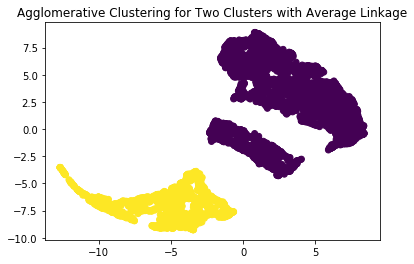

Silhouette Score:  0.5912625
Davies Bouldin Index:  0.5442469179259961


In [535]:
umap_results = umap.UMAP(n_neighbors=10,
                      min_dist=0.1,
                      metric='correlation').fit_transform(X_all)


agg_clusters = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=2)
cluster_labels = agg_clusters.fit_predict(umap_results)

plt.title('Agglomerative Clustering for Two Clusters with Average Linkage')
plt.scatter(umap_results[:,0], umap_results[:,1], c=cluster_labels)
plt.show()

print('Silhouette Score: ', metrics.silhouette_score(umap_results, cluster_labels, metric='euclidean'))
print('Davies Bouldin Index: ', metrics.davies_bouldin_score(umap_results, cluster_labels))

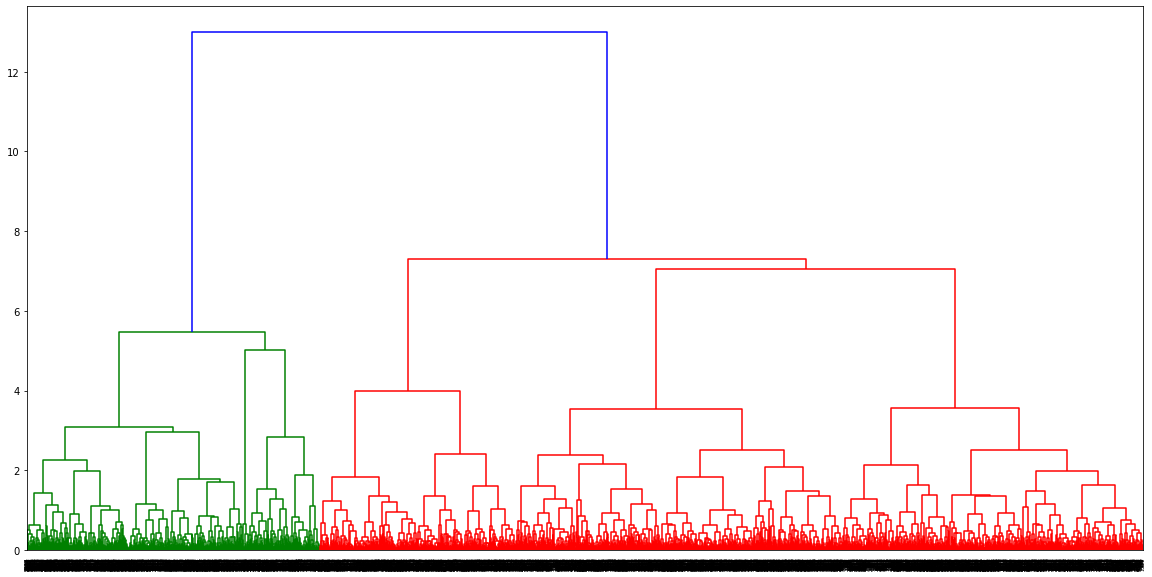

In [536]:
umap_results = umap.UMAP(n_neighbors=10,
                      min_dist=0.1,
                      metric='correlation').fit_transform(X_all)
agg_cluster = AgglomerativeClustering(linkage='average', affinity='euclidean', n_clusters=2)
clusters = agg_cluster.fit_predict(umap_results)

plt.figure(figsize=(20,10))
dendrogram(lnkg(umap_results, method='average'))
plt.show()

## Agglomerative Clustering for Features Highly Correlated with humansDeaths with UMAP Components

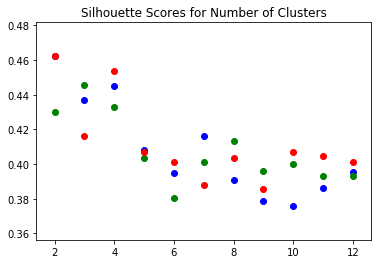

Best Silhouette score with ward linkage is 0.4622753858566284 with 2 clusters. 
Best Silhouette score with complete linkage is 0.4456113576889038 with 3 clusters. 
Best Silhouette score with average linkage is 0.4622753858566284 with 2 clusters. 
Best Davies Bouldin score:  0.6802449498976527


In [399]:
agglomerative_clustering(X_hd, 'UMAP', neighbors=30, min_distance=0.25)

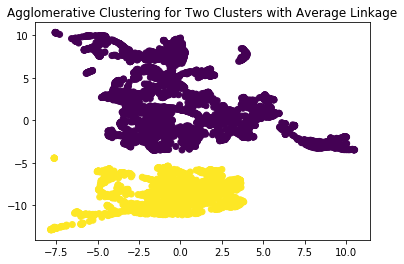

Silhouette Score:  0.4996776
Davies Bouldin Index:  0.6976677924897093


In [405]:
umap_results = umap.UMAP(n_neighbors=30,
                      min_dist=0.25,
                      metric='correlation').fit_transform(X_hd)


agg_clusters = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=2)
cluster_labels = agg_clusters.fit_predict(umap_results)

plt.title('Agglomerative Clustering for Two Clusters with Average Linkage')
plt.scatter(umap_results[:,0], umap_results[:,1], c=cluster_labels)
plt.show()

print('Silhouette Score: ', metrics.silhouette_score(umap_results, cluster_labels, metric='euclidean'))
print('Davies Bouldin Index: ', metrics.davies_bouldin_score(umap_results, cluster_labels))

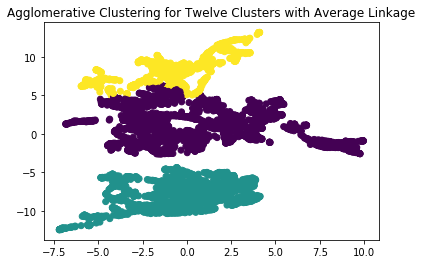

Silhouette Score:  0.4371869
Davies Bouldin Index:  0.8574155813254362


In [406]:
umap_results = umap.UMAP(n_neighbors=30,
                      min_dist=0.25,
                      metric='correlation').fit_transform(X_hd)

agg_clusters = AgglomerativeClustering(linkage='complete', 
                                      affinity='euclidean',
                                      n_clusters=3)
cluster_labels = agg_clusters.fit_predict(umap_results)

plt.title('Agglomerative Clustering for Twelve Clusters with Average Linkage')
plt.scatter(umap_results[:,0], umap_results[:,1], c=cluster_labels)
plt.show()

print('Silhouette Score: ', metrics.silhouette_score(umap_results, cluster_labels, metric='euclidean'))
print('Davies Bouldin Index: ', metrics.davies_bouldin_score(umap_results, cluster_labels))

## Cluster Labels for humansDeaths features with PCA Components

In [407]:
# Agglomerative Clustering with humansDeaths features

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_hd)

agg_cluster = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=2)
labels = agg_cluster.fit_predict(umap_results)
print(X.shape)
print(len(labels))
unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique, counts)))
X['X_hd_agg_clusters'] = labels
group_0 = X[X['X_hd_agg_clusters'] == 0]
group_1 = X[X['X_hd_agg_clusters'] == 1]

get_pvalue_2clusters(X.columns)

(5831, 294)
5831
{0: 3794, 1: 2037}
Influenza - Avian : [0.]
H5N8 HPAI : [0.]
UnknownSerotypes : [0.]
birds : [0.]
mammals : [0.]
X_hd_umap_kmeans_clusters : [0.]
X_hd_agg_clusters : [0.]
unspecified : [3.78337874e-305]
African swine fever : [8.34241273e-214]
H5N1 HPAI : [7.64932332e-188]
norm_sumCases : [1.17600277e-134]
norm_sumCases_std : [1.17600277e-134]
norm_sumDeaths : [1.6594837e-122]
X_all_pca_kmeans_clusters : [8.32272729e-111]
X_hd_pca_kmeans_clusters : [7.96850269e-96]
H5N6 HPAI : [5.59286889e-94]
Foot and mouth disease : [2.36373646e-85]
X_all_umap_kmeans_clusters : [2.68326525e-82]
norm_sumDestroyed : [5.55678896e-80]
norm_sumDestroyed_std : [5.55678896e-80]
Newcastle disease : [1.74972018e-76]
Taiwan (Province of China) : [7.37521414e-71]
observationYear : [1.24932729e-65]
H5N2 HPAI : [2.01177803e-62]
Indonesia : [2.20257271e-51]
Bluetongue : [8.72202612e-48]
norm_sumAtRisk_std : [2.21573321e-45]
norm_sumAtRisk : [2.21573321e-45]
O : [6.22610992e-45]
Europe : [3.07368068

In [408]:
def plot_hd_agglomerative_clusters():
    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_hd_agg_clusters'], y=X['sumCases'])
    plt.title('Agglomerative Clusters vs sumCases (p-value = 3.31e-25)')
    box.set_ylim(0, 100000)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_hd_agg_clusters'], y=X['sumDeaths'])
    plt.title('Agglomerative Clusters vs sumDeaths (p-value = 5.88e-19)')
    box.set_ylim(0, 50000)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_hd_agg_clusters'], y=X['humansAffected'])
    plt.title('Agglomerative Clusters vs humansAffected (p-value = 1.26e-106)')
    box.set_ylim(0, 100)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_hd_agg_clusters'], y=X['humansDeaths'])
    plt.title('Agglomerative Clusters vs humansDeaths (p-value = 6.24e-114)')
    box.set_ylim(0, 100)
    plt.show()
    
    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_hd_agg_clusters'], y=X['Africa'])
    plt.title('Agglomerative Clusters vs Africa (p-value = 4.27e-224)')
# box.set_ylim(0, 250000)
    plt.show()


    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_hd_agg_clusters'], y=X['Asia'])
    plt.title('Agglomerative Clusters vs Asia (p-value = 0)')
# box.set_ylim(0, 100000)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_hd_agg_clusters'], y=X['Europe'])
    plt.title('Agglomerative Clusters vs Europe (p-value = 0)')
# box.set_ylim(0, 250000)
    plt.show()


    plt.figure(figsize=(10,3))
    sns.boxenplot(x=X['X_hd_agg_clusters'], y=X['Americas'])
    plt.title('Agglomerative Clusters vs Americas (p-value = 7.91e-30)')
# scatterplot.set_ylim(0, 600)
    plt.show()


    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_hd_agg_clusters'], y=X['African swine fever'])
    plt.title('Agglomerative Clusters vs African swine fever (p-value = 0)')
# box.set_ylim(0, 50000)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_hd_agg_clusters'], y=X['Foot and mouth disease'])
    plt.title('Agglomerative Clusters vs Foot and mouth disease (p-value = 0)')
# box.set_ylim(0, 100)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_hd_agg_clusters'], y=X['Influenza - Avian'])
    plt.title('Agglomerative Clusters vs Influenza - Avian (p-value = 0)')
# box.set_ylim(0, 100)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_hd_agg_clusters'], y=X['UnknownSerotypes'])
    plt.title('Agglomerative Clusters vs UnknownSerotypes (p-value = 0)')
# box.set_ylim(0, 500)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_hd_agg_clusters'], y=X['birds'])
    plt.title('Agglomerative Clusters vs birds (p-value = 0)')
# box.set_ylim(0, 10)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_hd_agg_clusters'], y=X['mammals'])
    plt.title('Agglomerative Clusters vs mammals (p-value = 0)')
# box.set_ylim(0, 10)
    plt.show()


    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_hd_agg_clusters'], y=X['wild'])
    plt.title('Agglomerative Clusters vs wild (p-value = 1.72e-160)')
# box.set_ylim(0, 250000)
    plt.show()

## Agglomerative Clusters (humansDeaths Features, PCA components)

- cluster 0: humansAffected & humansDeaths, African Swine Fever, Foot and Mouth Disease, unknown serotypes, mammals, wild
- cluster 1: sumCases & sumDeaths, Americas, Influenza - Avian, birds

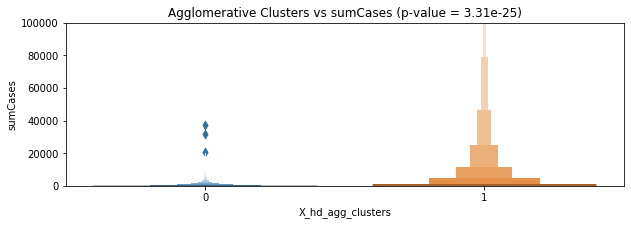

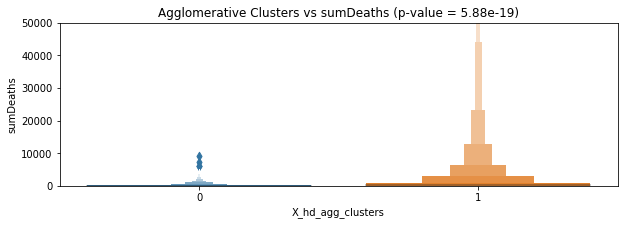

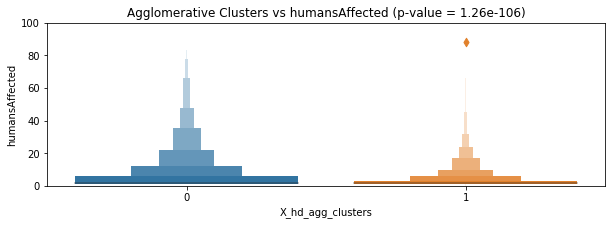

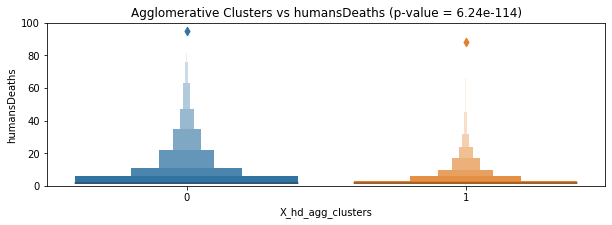

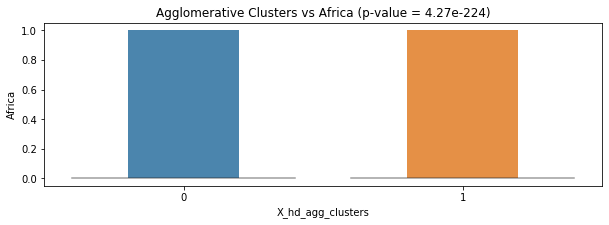

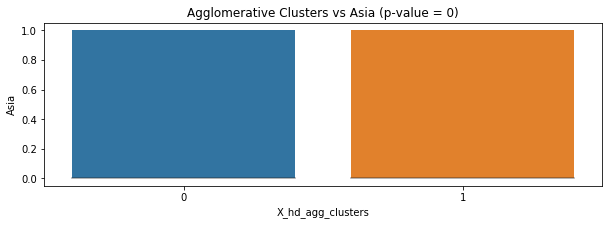

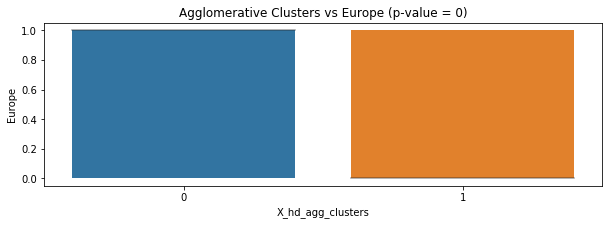

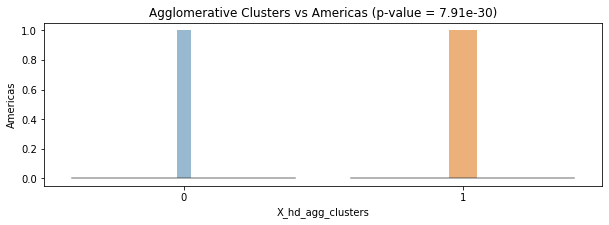

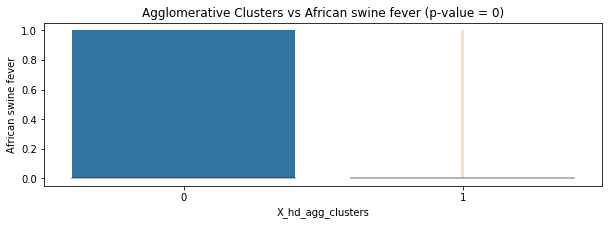

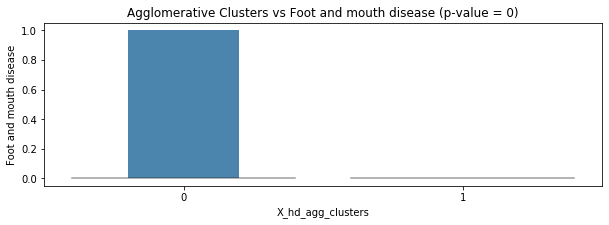

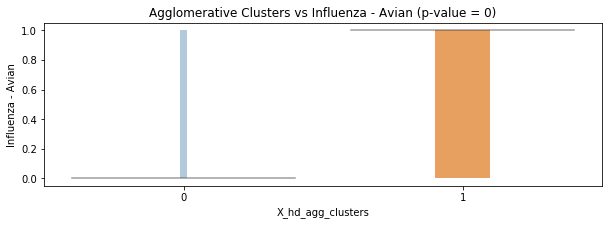

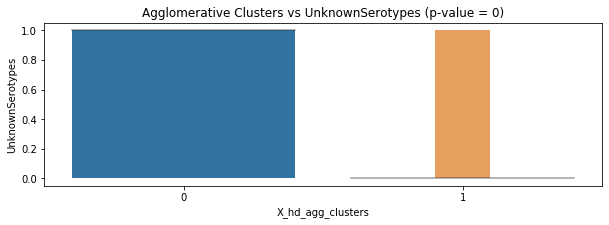

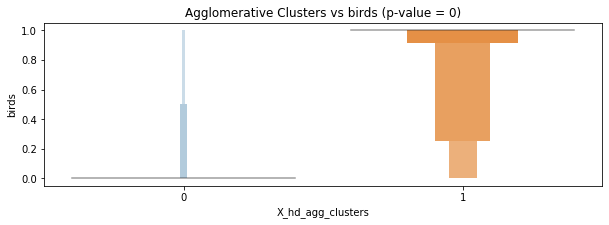

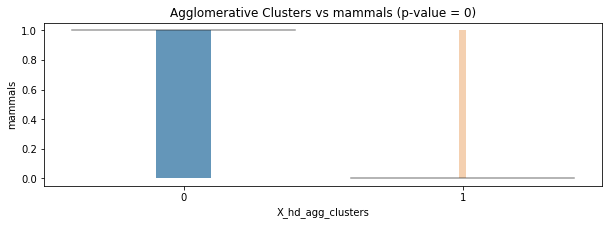

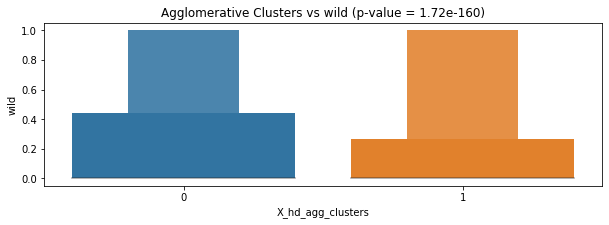

In [409]:
plot_hd_agglomerative_clusters()


## DBSCAN with PCA Components 

In [423]:
def dbscan_find_clusters(eps, min_samples, X):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    num_labels = len(set(labels))
    num_samples = X.shape[0]
    silhouettes_dbscan = {}
    if num_labels == 1 or num_labels == num_samples:
          silhouette = -1
          silhouettes_dbscan[silhouette] = min_samples
          print('{} min samples and {} eps have no clusters.'.format(min_samples, eps))
    else:
          silhouette = metrics.silhouette_score(X, labels)
          print('{} min samples and {} eps have {} silhouette score with {} clusters.'.format(min_samples, eps, silhouette, num_labels))
          return {
            'eps': eps,
            'min_samples': min_samples,
            'silhouette_score': silhouette,
            'davies_bouldin': metrics.davies_bouldin_score(X, labels)
            }
          silhouettes_dbscan[silhouette] = min_samples
    plt.title('Silhouette Scores for {} eps'.format(eps))
    plt.scatter(list(silhouettes_dbscan.values()), list(silhouettes_dbscan.keys()), color='blue')
    plt.xlabel('Min Samples')
    plt.ylabel('Silhouette Score')

In [424]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_all)

results = [dbscan_find_clusters(eps, min_samples, pca_components) for eps in [0.5, 1, 2] for min_samples in [5,10,15,20]]


5 min samples and 0.5 eps have -0.38013125124501695 silhouette score with 99 clusters.
10 min samples and 0.5 eps have -0.2724487487666301 silhouette score with 47 clusters.
15 min samples and 0.5 eps have -0.3305184661460625 silhouette score with 41 clusters.
20 min samples and 0.5 eps have -0.4132575616400718 silhouette score with 36 clusters.
5 min samples and 1 eps have -0.15398471646803802 silhouette score with 38 clusters.
10 min samples and 1 eps have -0.3264288901676083 silhouette score with 20 clusters.
15 min samples and 1 eps have -0.15723069342150442 silhouette score with 12 clusters.
20 min samples and 1 eps have -0.20376585396178343 silhouette score with 11 clusters.
5 min samples and 2 eps have 0.4983324678759525 silhouette score with 11 clusters.
10 min samples and 2 eps have 0.33877848292592305 silhouette score with 6 clusters.
15 min samples and 2 eps have 0.3096054380354462 silhouette score with 6 clusters.
20 min samples and 2 eps have 0.22132702974220045 silhouette

## DBSCAN with PCA Components humansDeaths

In [425]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_hd)

results = [dbscan_find_clusters(eps, min_samples, pca_components) for eps in [0.5,1,2] for min_samples in [5,10,15]]


5 min samples and 0.5 eps have -0.05439051864535696 silhouette score with 32 clusters.
10 min samples and 0.5 eps have -0.10905880961983203 silhouette score with 19 clusters.
15 min samples and 0.5 eps have 0.15871074772214921 silhouette score with 17 clusters.
5 min samples and 1 eps have -0.07156421583282196 silhouette score with 15 clusters.
10 min samples and 1 eps have 0.048828392727522256 silhouette score with 10 clusters.
15 min samples and 1 eps have 0.43422966446924055 silhouette score with 8 clusters.
5 min samples and 2 eps have 0.6738493280822249 silhouette score with 7 clusters.
10 min samples and 2 eps have 0.7150805686387631 silhouette score with 6 clusters.
15 min samples and 2 eps have 0.6614172975866344 silhouette score with 6 clusters.


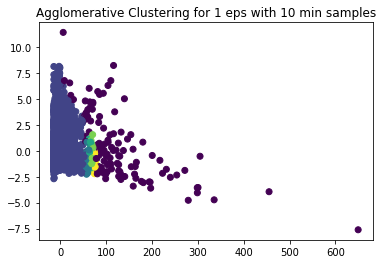

Silhouette Score:  0.715080568639317
Davies Bouldin Index:  0.9973056758363832


In [540]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_hd)

dbscan = DBSCAN(eps=2, min_samples=10)
labels = dbscan.fit_predict(pca_components)

plt.title('Agglomerative Clustering for 1 eps with 10 min samples')
plt.scatter(pca_components[:,0], pca_components[:,1], c=labels)
plt.show()

print('Silhouette Score: ', metrics.silhouette_score(pca_components, labels, metric='euclidean'))
print('Davies Bouldin Index: ', metrics.davies_bouldin_score(pca_components, labels))

## DBSCAN with UMAP Components 

5 min samples and 0.5 eps have 0.49005669355392456 silhouette score with 3 clusters.
10 min samples and 0.5 eps have 0.49005669355392456 silhouette score with 3 clusters.
15 min samples and 0.5 eps have 0.12909244000911713 silhouette score with 5 clusters.
20 min samples and 0.5 eps have 0.18770696222782135 silhouette score with 5 clusters.
5 min samples and 1 eps have 0.5451533198356628 silhouette score with 2 clusters.
10 min samples and 1 eps have 0.5451533198356628 silhouette score with 2 clusters.
15 min samples and 1 eps have 0.5451533198356628 silhouette score with 2 clusters.
20 min samples and 1 eps have 0.5451533198356628 silhouette score with 2 clusters.
5 min samples and 2 eps have no clusters.
10 min samples and 2 eps have no clusters.
15 min samples and 2 eps have no clusters.
20 min samples and 2 eps have no clusters.


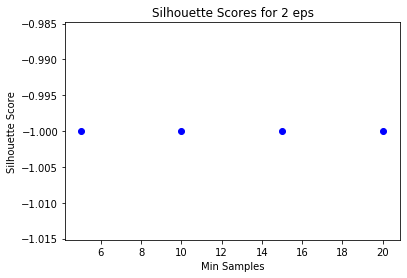

In [546]:
umap_results = umap.UMAP(n_neighbors=10,
                      min_dist=0.1,
                      metric='correlation').fit_transform(X_all)

results = [dbscan_find_clusters(eps, min_samples, umap_results) for eps in [0.5,1,2] for min_samples in [5,10,15,20]]

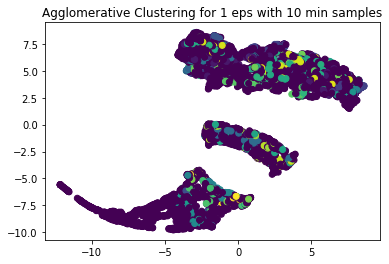

Silhouette Score:  -0.6731307
Davies Bouldin Index:  41.13349666044917
Cluster labels: [0 1] [2033 3798]


In [550]:
umap_results = umap.UMAP(n_neighbors=10,
                      min_dist=0.1,
                      metric='correlation').fit_transform(X_all)

dbscan = DBSCAN(eps=1, min_samples=10)
labels = dbscan.fit_predict(X_hd)

plt.title('Agglomerative Clustering for 1 eps with 10 min samples')
plt.scatter(umap_results[:,0], umap_results[:,1], c=labels)
plt.show()

print('Silhouette Score: ', metrics.silhouette_score(umap_results, labels, metric='euclidean'))
print('Davies Bouldin Index: ', metrics.davies_bouldin_score(umap_results, labels))
print('Cluster labels:', unique, counts)

## DBSCAN with UMAP Components humansDeaths

In [544]:
umap_results = umap.UMAP(n_neighbors=30,
                      min_dist=0.25,
                      metric='correlation').fit_transform(X_hd)
results = [dbscan_find_clusters(eps, min_samples, umap_results) for eps in [0.5,1,2] for min_samples in [5,10,15,20]]


5 min samples and 0.5 eps have -0.012788607738912106 silhouette score with 9 clusters.
10 min samples and 0.5 eps have -0.016735190525650978 silhouette score with 10 clusters.
15 min samples and 0.5 eps have -0.06453099846839905 silhouette score with 13 clusters.
20 min samples and 0.5 eps have 0.03532202169299126 silhouette score with 16 clusters.
5 min samples and 1 eps have 0.2943231761455536 silhouette score with 3 clusters.
10 min samples and 1 eps have 0.2943231761455536 silhouette score with 3 clusters.
15 min samples and 1 eps have 0.2943231761455536 silhouette score with 3 clusters.
20 min samples and 1 eps have 0.2943231761455536 silhouette score with 3 clusters.
5 min samples and 2 eps have 0.2943231761455536 silhouette score with 3 clusters.
10 min samples and 2 eps have 0.2943231761455536 silhouette score with 3 clusters.
15 min samples and 2 eps have 0.2943231761455536 silhouette score with 3 clusters.
20 min samples and 2 eps have 0.2943231761455536 silhouette score with

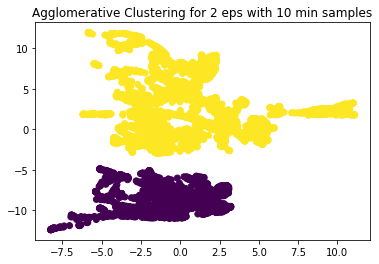

Silhouette Score:  0.5274246
Davies Bouldin Index:  0.6514078853947037
Cluster labels: [0 1] [2033 3798]


In [545]:
umap_results = umap.UMAP(n_neighbors=30,
                      min_dist=0.25,
                      metric='correlation').fit_transform(X_hd)

dbscan = DBSCAN(eps=2, min_samples=10)
labels = dbscan.fit_predict(umap_results)
unique, counts = np.unique(labels, return_counts=True)

plt.title('Agglomerative Clustering for 2 eps with 10 min samples')
plt.scatter(umap_results[:,0], umap_results[:,1], c=labels)
plt.show()

print('Silhouette Score: ', metrics.silhouette_score(umap_results, labels, metric='euclidean'))
print('Davies Bouldin Index: ', metrics.davies_bouldin_score(umap_results, labels))
print('Cluster labels:', unique, counts)

## GMM With PCA Components

In [551]:
 def gmm_find_clusters(n_components, covariance_type, X):
    gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type)
    labels = gmm.fit_predict(X)
    num_labels = len(set(labels))
    num_samples = X.shape[0]
    silhouettes_gmm = {}
    if num_labels == 1 or num_labels == num_samples:
        silhouette = -1
        silhouettes_dbscan[silhouette] = min_samples
        print('{} n components and {} covariance have no clusters.'.format(n_components, covariance_type))
    else:
          silhouette = metrics.silhouette_score(X, labels)
          print('{} n components and {} covariance have {} silhouette score with {} clusters.'.format(n_components, covariance_type, silhouette, num_labels))
          return {
            'n_components': n_components,
            'covariance_type': covariance_type,
            'silhouette_score': silhouette,
            'davies_bouldin': metrics.davies_bouldin_score(X, labels)
            }
          silhouettes_dbscan[silhouette] = n_components
    plt.title('Silhouette Scores for {} covariance'.format(covariance_type))
    plt.scatter(list(silhouettes_gmm.values()), list(silhouettes_gmm.keys()), color='blue')
    plt.xlabel('Number of Components')
    plt.ylabel('Silhouette Score')
    plt.show()

In [438]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_all)

results = [gmm_find_clusters(n_components,covariance_type, pca_components) for n_components in [2,5,10,15]
           for covariance_type in ['full','tied','diag','spherical']]

2 n components and full covariance have 0.6674649567290156 silhouette score with 2 clusters.
2 n components and tied covariance have 0.8603324095978963 silhouette score with 2 clusters.
2 n components and diag covariance have 0.6686573596571233 silhouette score with 2 clusters.
2 n components and spherical covariance have 0.7161363881538289 silhouette score with 2 clusters.
5 n components and full covariance have 0.1901991687636544 silhouette score with 5 clusters.
5 n components and tied covariance have 0.6806127158102079 silhouette score with 4 clusters.
5 n components and diag covariance have 0.32434257241099723 silhouette score with 5 clusters.
5 n components and spherical covariance have 0.4750788936773683 silhouette score with 5 clusters.
10 n components and full covariance have 0.19661061940133845 silhouette score with 10 clusters.
10 n components and tied covariance have 0.3818628805978084 silhouette score with 10 clusters.
10 n components and diag covariance have 0.38712092682

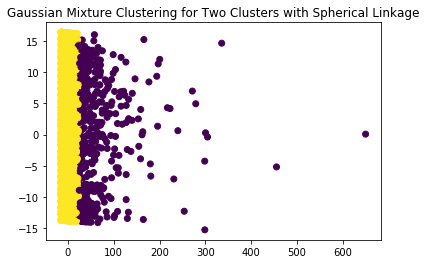

Silhouette Score:  0.7161363881538289
Davies Bouldin Index:  0.7092540118848274


In [441]:
# plotting the clusters with the best silhouette score

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_all)
gmm = GaussianMixture(n_components=2, covariance_type='spherical')
cluster_labels = gmm.fit_predict(pca_components)

plt.title('Gaussian Mixture Clustering for Two Clusters with Spherical Linkage')
plt.scatter(pca_components[:,0], pca_components[:,1], c=cluster_labels)
plt.show()

print('Silhouette Score: ', metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean'))
print('Davies Bouldin Index: ', metrics.davies_bouldin_score(pca_components, cluster_labels))

## GMM Clustering with humansDeaths PCA Components

In [442]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_hd)

results = [gmm_find_clusters(n_components,covariance_type, pca_components) for n_components in [2,5,10,15]
           for covariance_type in ['full','tied','diag','spherical']]

2 n components and full covariance have 0.5326343311385986 silhouette score with 2 clusters.
2 n components and tied covariance have 0.8887560509300614 silhouette score with 2 clusters.
2 n components and diag covariance have 0.5522201061447705 silhouette score with 2 clusters.
2 n components and spherical covariance have 0.6851218333718575 silhouette score with 2 clusters.
3 n components and full covariance have 0.3797889479300346 silhouette score with 3 clusters.
3 n components and tied covariance have 0.808734402574715 silhouette score with 3 clusters.
3 n components and diag covariance have 0.40231578641355475 silhouette score with 3 clusters.
3 n components and spherical covariance have 0.5581147777140304 silhouette score with 3 clusters.
4 n components and full covariance have 0.3525013715947205 silhouette score with 4 clusters.
4 n components and tied covariance have 0.7583730106598935 silhouette score with 4 clusters.
4 n components and diag covariance have 0.3865852656183438 s

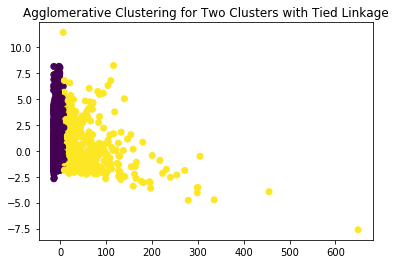

Silhouette Score:  0.685121833371857
Davies Bouldin Index:  0.7343733783168446


In [444]:
# plotting the clusters with the best silhouette score

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_hd)
gmm = GaussianMixture(n_components=2, covariance_type='spherical')
cluster_labels = gmm.fit_predict(pca_components)

plt.title('Agglomerative Clustering for Two Clusters with Tied Linkage')
plt.scatter(pca_components[:,0], pca_components[:,1], c=cluster_labels)
plt.show()

print('Silhouette Score: ', metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean'))
print('Davies Bouldin Index: ', metrics.davies_bouldin_score(pca_components, cluster_labels))

## GMM Clustering for All Features with UMAP Components

In [445]:
umap_results = umap.UMAP(n_neighbors=10,
                      min_dist=0.1,
                      metric='correlation').fit_transform(X_all)

results = [gmm_find_clusters(n_components,covariance_type, umap_results) for n_components in [2,5,10,15]
           for covariance_type in ['full','tied','diag','spherical']]

2 n components and full covariance have 0.6141465306282043 silhouette score with 2 clusters.
2 n components and tied covariance have 0.6150309443473816 silhouette score with 2 clusters.
2 n components and diag covariance have 0.6138144135475159 silhouette score with 2 clusters.
2 n components and spherical covariance have 0.6139499545097351 silhouette score with 2 clusters.
5 n components and full covariance have 0.5533324480056763 silhouette score with 5 clusters.
5 n components and tied covariance have 0.5208461880683899 silhouette score with 5 clusters.
5 n components and diag covariance have 0.5590235590934753 silhouette score with 5 clusters.
5 n components and spherical covariance have 0.5291510224342346 silhouette score with 5 clusters.
10 n components and full covariance have 0.42931947112083435 silhouette score with 10 clusters.
10 n components and tied covariance have 0.4342024624347687 silhouette score with 10 clusters.
10 n components and diag covariance have 0.448788911104

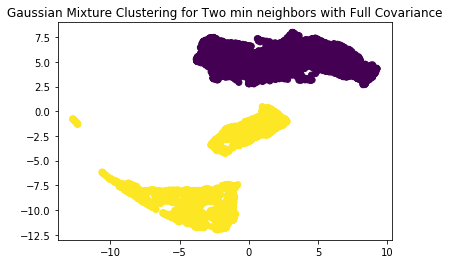

Silhouette Score:  0.57917416
Davies Bouldin Index:  0.6402765181514637


In [446]:
umap_results = umap.UMAP(n_neighbors=10,
                      min_dist=0.1,
                      metric='correlation').fit_transform(X_all)

gmm = GaussianMixture(n_components=2, covariance_type='diag')
cluster_labels = gmm.fit_predict(umap_results)

plt.title('Gaussian Mixture Clustering for Two min neighbors with Full Covariance')
plt.scatter(umap_results[:,0], umap_results[:,1], c=cluster_labels)
plt.show()

print('Silhouette Score: ', metrics.silhouette_score(umap_results, cluster_labels, metric='euclidean'))
print('Davies Bouldin Index: ', metrics.davies_bouldin_score(umap_results, cluster_labels))

## GMM Clustering for humansDeaths Features with UMAP Components

In [447]:
umap_results = umap.UMAP(n_neighbors=30,
                      min_dist=0.25,
                      metric='correlation').fit_transform(X_hd)

results = [gmm_find_clusters(n_components,covariance_type, umap_results) for n_components in [2,5,10,15]
           for covariance_type in ['full','tied','diag','spherical']]

2 n components and full covariance have 0.40577661991119385 silhouette score with 2 clusters.
2 n components and tied covariance have 0.41997474431991577 silhouette score with 2 clusters.
2 n components and diag covariance have 0.37413862347602844 silhouette score with 2 clusters.
2 n components and spherical covariance have 0.4309743046760559 silhouette score with 2 clusters.
5 n components and full covariance have 0.4366190731525421 silhouette score with 5 clusters.
5 n components and tied covariance have 0.4462679624557495 silhouette score with 5 clusters.
5 n components and diag covariance have 0.42243245244026184 silhouette score with 5 clusters.
5 n components and spherical covariance have 0.473453164100647 silhouette score with 5 clusters.
10 n components and full covariance have 0.3671221435070038 silhouette score with 10 clusters.
10 n components and tied covariance have 0.3893263638019562 silhouette score with 10 clusters.
10 n components and diag covariance have 0.3906381130

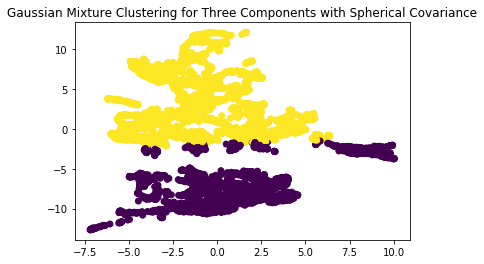

Silhouette Score:  0.47733784
Davies Bouldin Index:  0.7750543340441007


In [552]:
umap_results = umap.UMAP(n_neighbors=30,
                      min_dist=0.25,
                      metric='correlation').fit_transform(X_hd)

gmm = GaussianMixture(n_components=2, covariance_type='spherical')
cluster_labels = gmm.fit_predict(umap_results)

plt.title('Gaussian Mixture Clustering for Three Components with Spherical Covariance')
plt.scatter(umap_results[:,0], umap_results[:,1], c=cluster_labels)
plt.show()

print('Silhouette Score: ', metrics.silhouette_score(umap_results, cluster_labels, metric='euclidean'))
print('Davies Bouldin Index: ', metrics.davies_bouldin_score(umap_results, cluster_labels))

In [563]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_all)
gmm = GaussianMixture(n_components=2, covariance_type='spherical')
labels = gmm.fit_predict(pca_components)


print(X.shape)
print(len(labels))
unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique, counts)))
X['X_all_pca_gmm_clusters'] = labels
group_0 = X[X['X_all_pca_gmm_clusters'] == 0]
group_1 = X[X['X_all_pca_gmm_clusters'] == 1]

get_pvalue_2clusters(X.columns)

(5831, 292)
5831
{0: 5356, 1: 475}
norm_sumCases : [0.]
norm_sumDeaths : [0.]
norm_sumCases_std : [0.]
X_hd_pca_kmeans_clusters : [0.]
X_hd_umap_gmm_clusters : [0.]
X_all_pca_gmm_clusters : [0.]
norm_sumAtRisk_std : [2.34275894e-180]
norm_sumAtRisk : [2.34275894e-180]
X_all_umap_kmeans_clusters : [6.8812467e-162]
sumDeaths : [2.84251581e-134]
norm_sumDestroyed : [3.3377093e-121]
norm_sumDestroyed_std : [3.3377093e-121]
Influenza - Avian : [2.23915122e-116]
birds : [8.89762016e-112]
mammals : [6.77767611e-103]
sumCases : [6.6008471e-93]
sumAtRisk : [2.86419541e-82]
sumDestroyed : [6.94765877e-57]
UnknownSerotypes : [5.45855087e-55]
H5N2 HPAI : [8.07960308e-55]
Taiwan (Province of China) : [1.77306836e-53]
unspecified : [4.23603536e-49]
Asia : [1.2083521e-47]
Iraq : [4.43455453e-47]
H5N1 HPAI : [1.84588212e-44]
Europe : [6.42634761e-38]
H7N9 LPAI : [7.47039828e-37]
norm_humansDeaths : [8.34132889e-30]
norm_humansDeaths_std : [8.34132889e-30]
norm_humansAffected_std : [1.09052589e-28]
nor

In [564]:
def plot_gmm_all_clusters():
    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_all_pca_gmm_clusters'], y=X['sumCases'])
    plt.title('Gaussian Mixture Clusters vs sumCases (p-value = 3.31e-25)')
    box.set_ylim(0, 100000)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_all_pca_gmm_clusters'], y=X['sumDeaths'])
    plt.title('Gaussian Mixture Clusters vs sumDeaths (p-value = 5.88e-19)')
    box.set_ylim(0, 50000)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_all_pca_gmm_clusters'], y=X['humansAffected'])
    plt.title('Gaussian Mixture Clusters vs humansAffected (p-value = 3.39e-105)')
    box.set_ylim(0, 100)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_all_pca_gmm_clusters'], y=X['humansDeaths'])
    plt.title('Gaussian Mixture Clusters vs humansDeaths (p-value = 2.27e-112)')
    box.set_ylim(0, 100)
    plt.show()


    plt.figure(figsize=(10,3))
    sns.boxenplot(x=X['X_all_pca_gmm_clusters'], y=X['Americas'])
    plt.title('Gaussian Mixture Clusters vs Americas (p-value = 8.29e-30)')
    # scatterplot.set_ylim(0, 600)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_all_pca_gmm_clusters'], y=X['Africa'])
    plt.title('Gaussian Mixture Clusters vs Africa (p-value = 4.72e-224)')
    # box.set_ylim(0, 250000)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_all_pca_gmm_clusters'], y=X['Asia'])
    plt.title('Gaussian Mixture Clusters vs Asia (p-value = 0)')
        # box.set_ylim(0, 100000)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_all_pca_gmm_clusters'], y=X['Europe'])
    plt.title('Gaussian Mixture Clusters vs Europe (p-value = 0)')
    # box.set_ylim(0, 250000)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_all_pca_gmm_clusters'], y=X['African swine fever'])
    plt.title('Gaussian Mixture Clusters vs African swine fever (p-value = 0)')
# box.set_ylim(0, 50000)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_all_pca_gmm_clusters'], y=X['Foot and mouth disease'])
    plt.title('Gaussian Mixture Clusters vs Foot and mouth disease (p-value = 0)')
# box.set_ylim(0, 100)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_all_pca_gmm_clusters'], y=X['Influenza - Avian'])
    plt.title('Gaussian Mixture Clusters vs Influenza - Avian (p-value = 0)')
# box.set_ylim(0, 100)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_all_pca_gmm_clusters'], y=X['UnknownSerotypes'])
    plt.title('Gaussian Mixture Clusters vs UnknownSerotypes (p-value = 0)')
# box.set_ylim(0, 500)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_all_pca_gmm_clusters'], y=X['birds'])
    plt.title('Gaussian Mixture Clusters vs birds (p-value = 0)')
# box.set_ylim(0, 10)
    plt.show()
    
    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_all_pca_gmm_clusters'], y=X['mammals'])
    plt.title('Gaussian Mixture Clusters vs mammals (p-value = 0)')
    # box.set_ylim(0, 10)
    plt.show()


    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_all_pca_gmm_clusters'], y=X['wild'])
    plt.title('Gaussian Mixture Clusters vs wild (p-value = 1.16e-160)')
# box.set_ylim(0, 250000)
    plt.show()

## Gmm Clusters (all Features, PCA components)

- cluster 0: Europe, African Swine Fever, Foot and Mouth Diseasde, Influenza - Avian, unknown serotypes, birds, mammals, wild
- cluster 1: humansAffected & humansDeaths, sumCases & sumDeaths
- separation: 

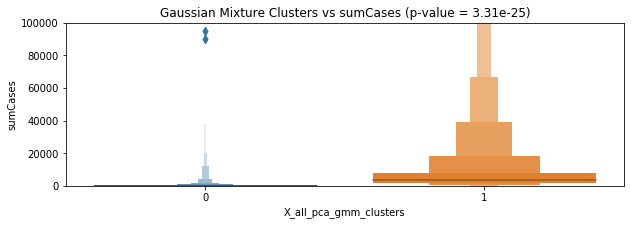

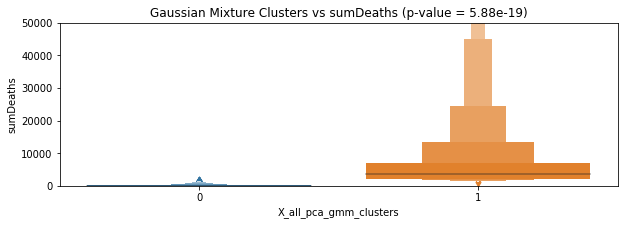

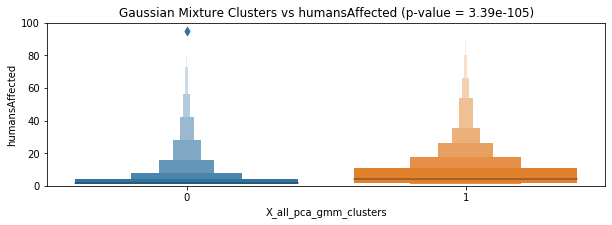

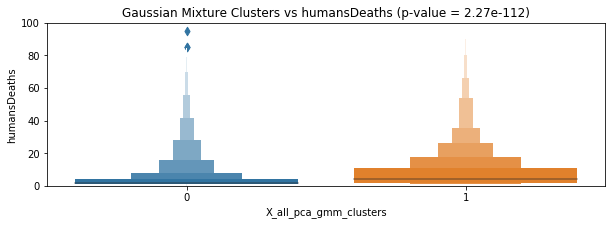

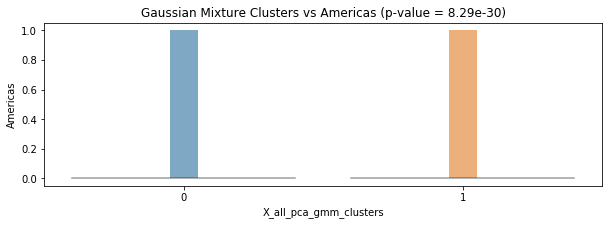

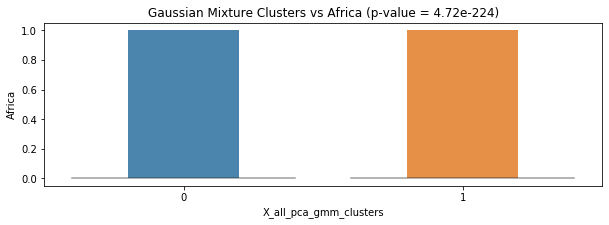

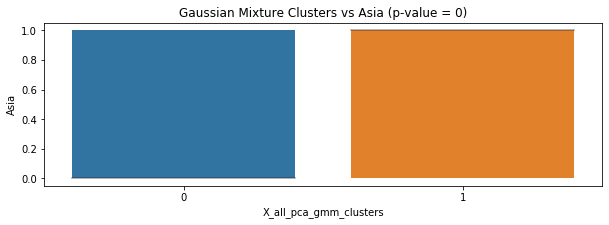

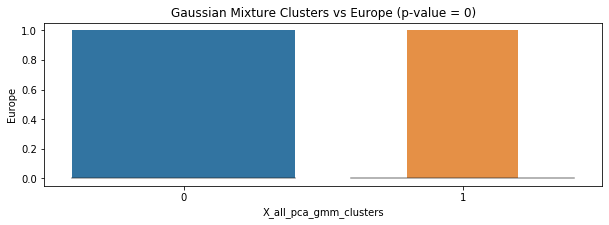

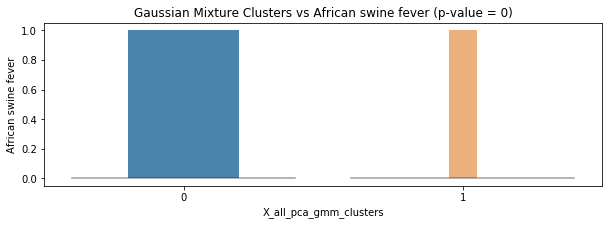

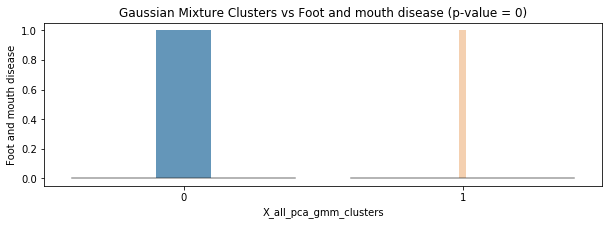

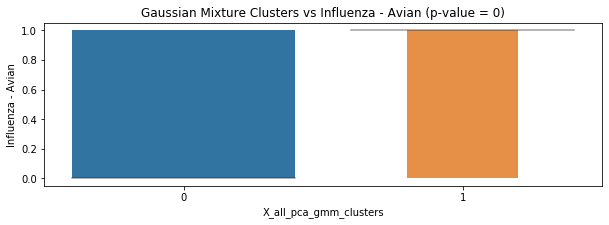

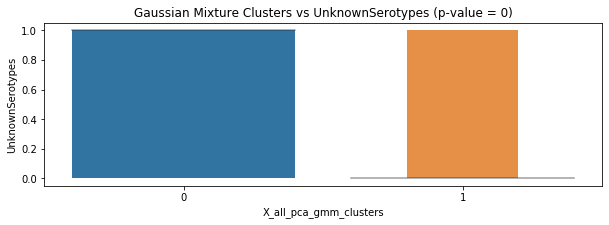

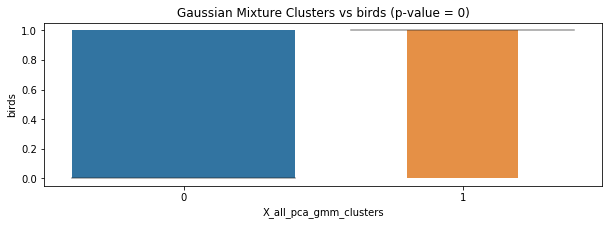

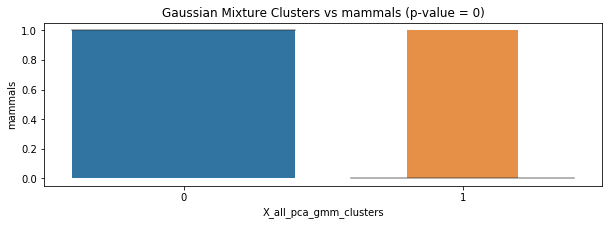

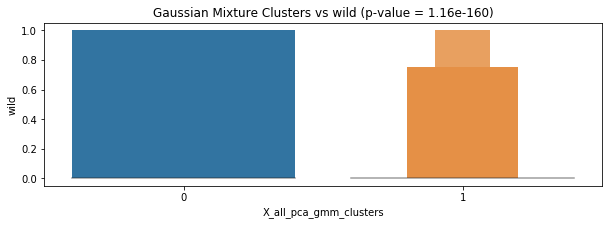

In [565]:
plot_gmm_all_clusters()

In [566]:
umap_results = umap.UMAP(n_neighbors=10,
                      min_dist=0.1,
                      metric='correlation').fit_transform(X_all)

gmm = GaussianMixture(n_components=2, covariance_type='spherical')
labels = gmm.fit_predict(umap_results)

print(X.shape)
print(len(labels))
unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique, counts)))
X['X_all_umap_gmm_clusters'] = labels
group_0 = X[X['X_all_umap_gmm_clusters'] == 0]
group_1 = X[X['X_all_umap_gmm_clusters'] == 1]

get_pvalue_3clusters(X.columns)

(5831, 293)
5831
{0: 4302, 1: 1529}


KeyError: "None of [Index(['X_hd_pca_kmeans_clusters'], dtype='object')] are in the [columns]"

In [567]:
def plot_gmm_clusters():
    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_all_umap_gmm_clusters'], y=X['sumCases'])
    plt.title('Gaussian Mixture Clusters vs sumCases (p-value = 3.31e-25)')
    box.set_ylim(0, 100000)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_all_umap_gmm_clusters'], y=X['sumDeaths'])
    plt.title('Gaussian Mixture Clusters vs sumDeaths (p-value = 5.88e-19)')
    box.set_ylim(0, 50000)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_all_umap_gmm_clusters'], y=X['humansAffected'])
    plt.title('Gaussian Mixture Clusters vs humansAffected (p-value = 3.39e-105)')
    box.set_ylim(0, 100)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_all_umap_gmm_clusters'], y=X['humansDeaths'])
    plt.title('Gaussian Mixture Clusters vs humansDeaths (p-value = 2.27e-112)')
    box.set_ylim(0, 100)
    plt.show()


    plt.figure(figsize=(10,3))
    sns.boxenplot(x=X['X_all_umap_gmm_clusters'], y=X['Americas'])
    plt.title('Gaussian Mixture Clusters vs Americas (p-value = 8.29e-30)')
    # scatterplot.set_ylim(0, 600)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_all_umap_gmm_clusters'], y=X['Africa'])
    plt.title('Gaussian Mixture Clusters vs Africa (p-value = 4.72e-224)')
    # box.set_ylim(0, 250000)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_all_umap_gmm_clusters'], y=X['Asia'])
    plt.title('Gaussian Mixture Clusters vs Asia (p-value = 0)')
        # box.set_ylim(0, 100000)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_all_umap_gmm_clusters'], y=X['Europe'])
    plt.title('Gaussian Mixture Clusters vs Europe (p-value = 0)')
    # box.set_ylim(0, 250000)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_all_umap_gmm_clusters'], y=X['African swine fever'])
    plt.title('Gaussian Mixture Clusters vs African swine fever (p-value = 0)')
# box.set_ylim(0, 50000)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_all_umap_gmm_clusters'], y=X['Foot and mouth disease'])
    plt.title('Gaussian Mixture Clusters vs Foot and mouth disease (p-value = 0)')
# box.set_ylim(0, 100)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_all_umap_gmm_clusters'], y=X['Influenza - Avian'])
    plt.title('Gaussian Mixture Clusters vs Influenza - Avian (p-value = 0)')
# box.set_ylim(0, 100)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_all_umap_gmm_clusters'], y=X['UnknownSerotypes'])
    plt.title('Gaussian Mixture Clusters vs UnknownSerotypes (p-value = 0)')
# box.set_ylim(0, 500)
    plt.show()

    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_all_umap_gmm_clusters'], y=X['birds'])
    plt.title('Gaussian Mixture Clusters vs birds (p-value = 0)')
# box.set_ylim(0, 10)
    plt.show()
    
    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_all_umap_gmm_clusters'], y=X['mammals'])
    plt.title('Gaussian Mixture Clusters vs mammals (p-value = 0)')
    # box.set_ylim(0, 10)
    plt.show()


    plt.figure(figsize=(10,3))
    box = sns.boxenplot(x=X['X_all_umap_gmm_clusters'], y=X['wild'])
    plt.title('Gaussian Mixture Clusters vs wild (p-value = 1.16e-160)')
# box.set_ylim(0, 250000)
    plt.show()

## GMM Clusters (all Features, UMAP components)

- cluster 0: humansAffected & humansDeaths, Europe, African Swine Fever
- cluster 1: sumCases & sumDeaths, Asia, wild

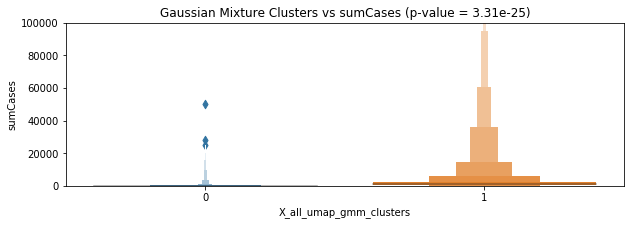

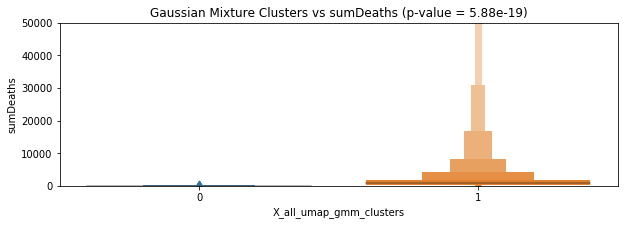

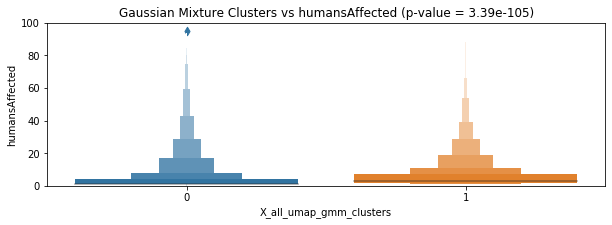

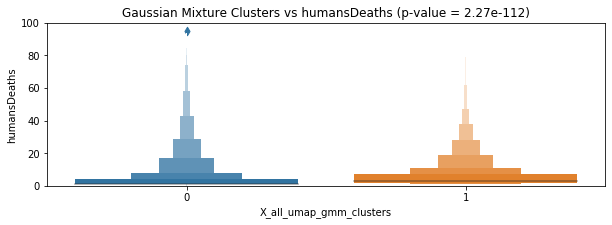

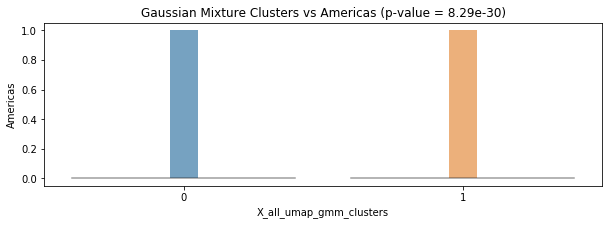

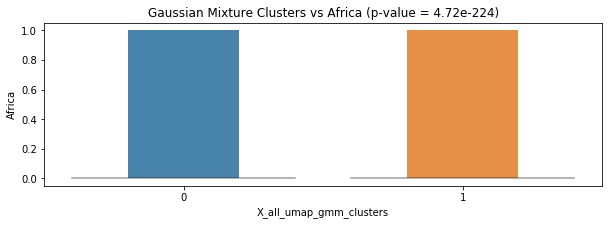

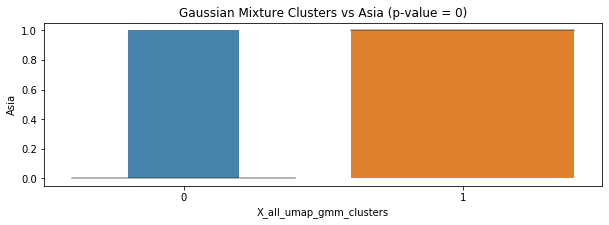

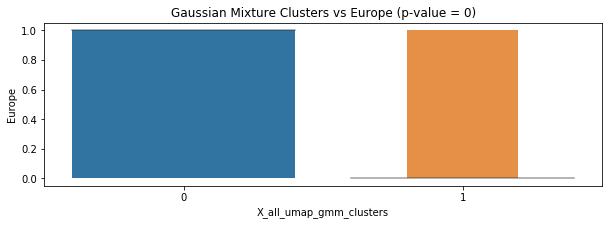

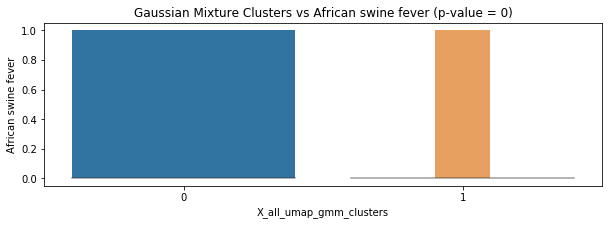

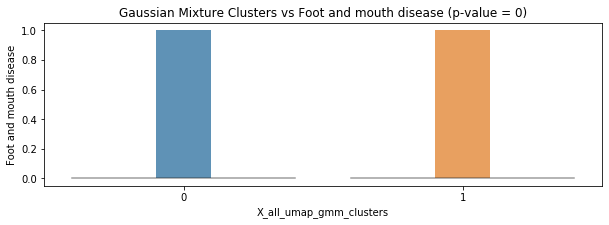

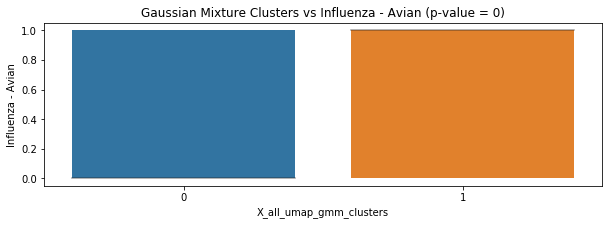

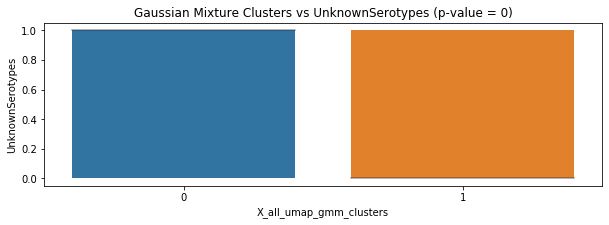

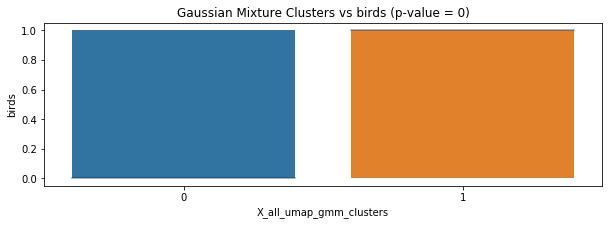

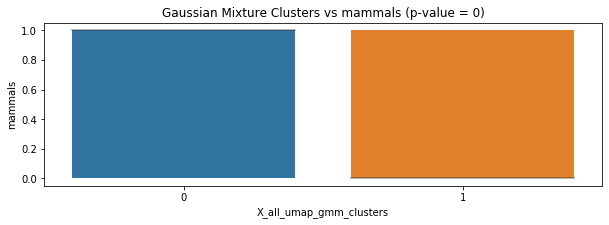

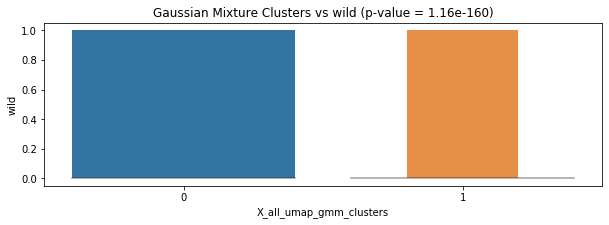

In [568]:
plot_gmm_clusters()

# Conclusions

- two clusters: humans vs. animals
- 
